In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import scale

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("cars_dataset.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


# Add visualisation

In [343]:
df.model.value_counts().count()

146

 # Data cleaning

C:\Users\erolm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

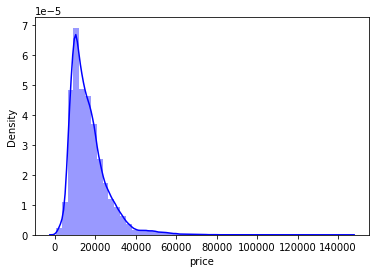

In [6]:
# REMOVING OUTLIERS IN OUR TARGET VARIABLE

sns.distplot(df['price'],color="blue")

# Find IQR

IQR describes the middle 50% of values when ordered from lowest to highest.
To find the interquartile range (IQR),
first find the median (middle value) of the lower and upper half of the data.
These values are quartile 1 (Q1) and quartile 3 (Q3). 
The IQR is the difference between Q3 and Q1.

In [7]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10186.0


In [8]:
df2 = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 1.5 * IQR)))]
df2.shape

(69735, 10)

C:\Users\erolm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

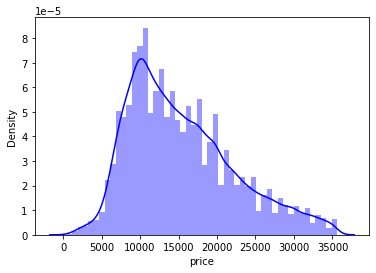

In [9]:
# Show the distribution of target variable - price: outliers removed

sns.distplot(df2['price'], color="blue")

In [10]:
df2.describe()

,year,price,mileage,tax,mpg,engineSize
count,69735.000000,69735.000000,69735.000000,69735.000000,69735.000000,69735.000000
mean,2017.001004,15404.885380,23805.311895,115.510074,56.545891,1.589496
std,2.099928,6883.956669,21435.652505,64.103842,16.791405,0.501995
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7914.500000,30.000000,47.900000,1.200000
50%,2017.000000,13998.000000,18358.000000,145.000000,56.500000,1.500000
75%,2019.000000,19500.000000,33080.500000,145.000000,62.800000,2.000000
max,2020.000000,35600.000000,323000.000000,580.000000,470.800000,6.300000


# Data selection




In [11]:
df2 = df2[df2['engineSize'] != 0]
df2 = df2[df2["year"] > 2015]

df2.describe()

,year,price,mileage,tax,mpg,engineSize
count,57212.000000,57212.000000,57212.000000,57212.000000,57212.000000,57212.000000
mean,2017.721265,16615.339806,18265.297927,120.668566,56.098899,1.570234
std,1.218044,6706.919558,15769.620073,55.173858,14.220062,0.483536
min,2016.000000,3990.000000,1.000000,0.000000,0.300000,0.600000
25%,2017.000000,11000.000000,6200.750000,125.000000,47.900000,1.000000
50%,2018.000000,15495.000000,14535.000000,145.000000,56.500000,1.500000
75%,2019.000000,20799.000000,26162.250000,145.000000,62.800000,2.000000
max,2020.000000,35600.000000,138000.000000,580.000000,470.800000,5.000000


In [12]:
df2.groupby("year").Make.count()

year
2016    11310
2017    16029
2018     9848
2019    17348
2020     2677
Name: Make, dtype: int64

In [13]:
df2.fuelType.value_counts()

Petrol      33674
Diesel      20929
Hybrid       2394
Other         213
Electric        2
Name: fuelType, dtype: int64

In [14]:
# REMOVING THE LESS THAN 10% DATA

df2 = df2[df2["fuelType"] != "Electric"]
df2 = df2[df2["fuelType"] != "Other"]
df2.fuelType.value_counts()

Petrol    33674
Diesel    20929
Hybrid     2394
Name: fuelType, dtype: int64

In [15]:
df2.transmission.value_counts()

Manual       34402
Semi-Auto    12339
Automatic    10253
Other            3
Name: transmission, dtype: int64

In [16]:
df2 = df2[df2["transmission"] != "Other"]
df2.transmission.value_counts()

Manual       34402
Semi-Auto    12339
Automatic    10253
Name: transmission, dtype: int64

In [17]:
df2.Make.value_counts()

Ford       14610
vw         12388
audi        7518
BMW         7495
skoda       5617
toyota      5297
Hyundai     4069
Name: Make, dtype: int64

# Now we will take a sample of our data to analyze

A 100 car sample from each maker would be enough

In [23]:
df3 = df2.groupby("Make").apply(lambda x: x.sample(100, random_state=1)).reset_index(drop=True)

In [344]:
df3 =df3.drop('model', axis=1)

In [345]:
df3.groupby("Make").count()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
Make,,,,,,,,
BMW,100,100,100,100,100,100,100,100
Ford,100,100,100,100,100,100,100,100
Hyundai,100,100,100,100,100,100,100,100
audi,100,100,100,100,100,100,100,100
skoda,100,100,100,100,100,100,100,100
toyota,100,100,100,100,100,100,100,100
vw,100,100,100,100,100,100,100,100


In [28]:
df3.fuelType.value_counts()

Petrol    399
Diesel    260
Hybrid     41
Name: fuelType, dtype: int64

In [346]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          700 non-null    int64  
 1   price         700 non-null    int64  
 2   transmission  700 non-null    object 
 3   mileage       700 non-null    int64  
 4   fuelType      700 non-null    object 
 5   tax           700 non-null    float64
 6   mpg           700 non-null    float64
 7   engineSize    700 non-null    float64
 8   Make          700 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 49.3+ KB


In [30]:
df3.to_csv('cars_final.csv', encoding='utf-8', index=False)

# Final data model

In [31]:
# ADD DUMMIES FOR YEAR, FUEL TYPE, TRANSMISSION AND MAKE

final = pd.get_dummies(df3, columns=['year','fuelType', 'transmission','Make'], prefix='', prefix_sep='')

In [32]:
# REMOVE MODEL FEATURE

final =final.drop('model', axis=1)

In [33]:
final.head()

,price,mileage,tax,mpg,engineSize,2016,2017,2018,2019,2020,...,Automatic,Manual,Semi-Auto,BMW,Ford,Hyundai,audi,skoda,toyota,vw
0,21998,15856,145.0,65.7,2.0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,24730,3049,145.0,62.8,2.0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,16980,19853,150.0,64.2,2.0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,23875,16261,145.0,39.8,3.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,18000,20087,165.0,44.8,2.0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [34]:
# SPLIT THE DATA INTO FEATURES AND TARGET

X = final.drop('price', axis=1)
y= final['price']

# SCALING THE FEATURES

In [35]:
from sklearn.preprocessing import scale

cols = X.columns

# Scale the features and convert it back to a dataframe
X = pd.DataFrame(scale(X))

# Write in the column names again
X.columns = cols
X

,mileage,tax,mpg,engineSize,2016,2017,2018,2019,2020,Diesel,...,Automatic,Manual,Semi-Auto,BMW,Ford,Hyundai,audi,skoda,toyota,vw
0,-0.157009,0.436110,0.807265,0.872951,-0.468521,-0.630242,-0.445679,1.448221,-0.22243,1.300887,...,-0.535504,-1.161462,1.982316,2.449490,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248
1,-0.928104,0.436110,0.576469,0.872951,-0.468521,-0.630242,-0.445679,1.448221,-0.22243,1.300887,...,-0.535504,-1.161462,1.982316,2.449490,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248
2,0.083646,0.527922,0.687888,0.872951,-0.468521,-0.630242,2.243765,-0.690502,-0.22243,1.300887,...,-0.535504,0.860984,-0.504460,2.449490,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248
3,-0.132624,0.436110,-1.253988,2.980802,-0.468521,1.586691,-0.445679,-0.690502,-0.22243,-0.768706,...,-0.535504,-1.161462,1.982316,2.449490,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248
4,0.097735,0.803360,-0.856062,0.872951,-0.468521,1.586691,-0.445679,-0.690502,-0.22243,-0.768706,...,-0.535504,0.860984,-0.504460,2.449490,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.493969,2.088736,-1.015232,2.980802,2.134375,-0.630242,-0.445679,-0.690502,-0.22243,1.300887,...,1.867399,-1.161462,-0.504460,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,2.449490
696,-0.785529,0.527922,-0.259174,-1.234899,-0.468521,-0.630242,-0.445679,1.448221,-0.22243,-0.768706,...,-0.535504,0.860984,-0.504460,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,2.449490
697,0.291125,0.436110,-0.179589,-0.180974,-0.468521,-0.630242,2.243765,-0.690502,-0.22243,-0.768706,...,-0.535504,0.860984,-0.504460,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,2.449490
698,0.115075,0.527922,0.266087,-1.234899,-0.468521,1.586691,-0.445679,-0.690502,-0.22243,-0.768706,...,-0.535504,0.860984,-0.504460,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,2.449490


In [36]:
X.describe()

,mileage,tax,mpg,engineSize,2016,2017,2018,2019,2020,Diesel,...,Automatic,Manual,Semi-Auto,BMW,Ford,Hyundai,audi,skoda,toyota,vw
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,700.000000,700.000000,...,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
mean,-6.090366e-17,-4.060244e-17,4.060244e-16,5.075305e-16,7.612958e-17,-3.806479e-18,1.015061e-16,9.643080e-17,0.000000,0.000000,...,-1.015061e-16,-4.060244e-17,-1.015061e-17,4.060244e-17,4.060244e-17,4.060244e-17,3.045183e-17,8.120488e-17,4.060244e-17,8.120488e-17
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715,1.000715,...,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00
min,-1.111440e+00,-2.226454e+00,-2.105548e+00,-1.234899e+00,-4.685213e-01,-6.302425e-01,-4.456794e-01,-6.905022e-01,-0.222430,-0.768706,...,-5.355042e-01,-1.161462e+00,-5.044604e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01
25%,-7.359471e-01,2.065783e-01,-6.093486e-01,-8.133292e-01,-4.685213e-01,-6.302425e-01,-4.456794e-01,-6.905022e-01,-0.222430,-0.768706,...,-5.355042e-01,-1.161462e+00,-5.044604e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01
50%,-2.731519e-01,4.361096e-01,-1.000043e-01,-1.809740e-01,-4.685213e-01,-6.302425e-01,-4.456794e-01,-6.905022e-01,-0.222430,-0.768706,...,-5.355042e-01,8.609840e-01,-5.044604e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01
75%,4.672361e-01,4.361096e-01,5.764686e-01,8.729513e-01,-4.685213e-01,1.586691e+00,-4.456794e-01,1.448221e+00,-0.222430,1.300887,...,-5.355042e-01,8.609840e-01,-5.044604e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01,-4.082483e-01
max,6.233798e+00,2.547798e+00,6.815936e+00,2.980802e+00,2.134375e+00,1.586691e+00,2.243765e+00,1.448221e+00,4.495789,1.300887,...,1.867399e+00,8.609840e-01,1.982316e+00,2.449490e+00,2.449490e+00,2.449490e+00,2.449490e+00,2.449490e+00,2.449490e+00,2.449490e+00


# SPLIT THE DATA INTO TRAIN AND TEST

70:30 % FOR TRAIN AND TEST
SAMPLE SEED IS 42

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

In [38]:
X.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', '2016', '2017', '2018', '2019',
       '2020', 'Diesel', 'Hybrid', 'Petrol', 'Automatic', 'Manual',
       'Semi-Auto', 'BMW', 'Ford', 'Hyundai', 'audi', 'skoda', 'toyota', 'vw'],
      dtype='object')

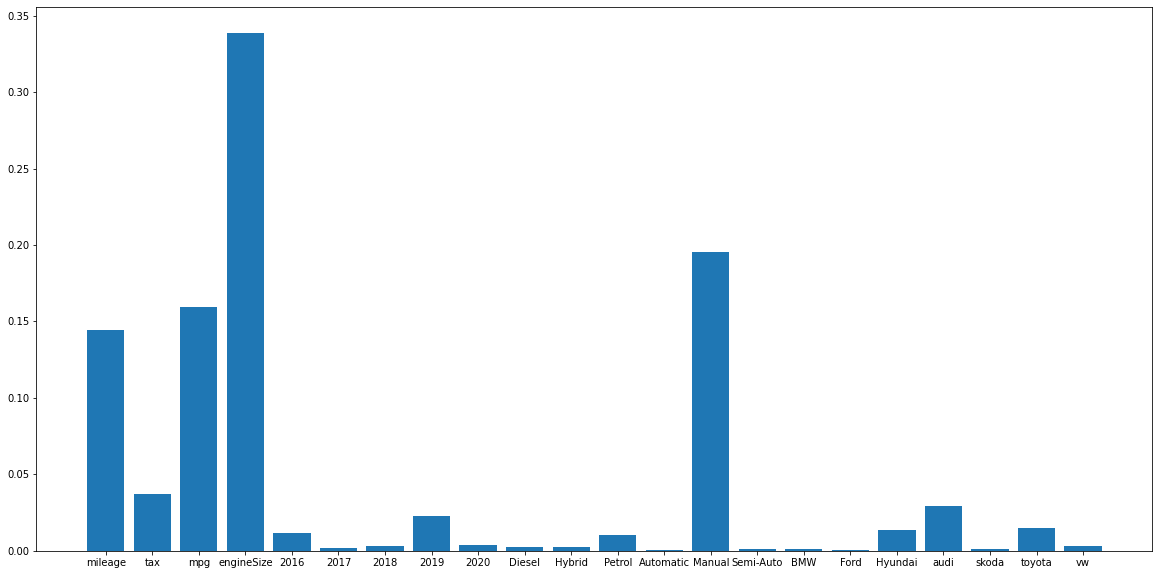

In [39]:
#AIC and BIC : 

# FROM SAS WE GET 

#year mileage fueltype tax mpg engineSize Make





#More feature importance visualisation

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train.values.ravel())

fig = plt.figure(figsize=(20,10))
plt.bar(range(X_train.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train.shape[1]), ['mileage', 'tax', 'mpg', 'engineSize', '2016', '2017', '2018', '2019',
       '2020', 'Diesel', 'Hybrid', 'Petrol', 'Automatic', 'Manual',
       'Semi-Auto', 'BMW', 'Ford', 'Hyundai', 'audi', 'skoda', 'toyota', 'vw'])
plt.show()

# LINEAR REGRESSION

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lm.predict(X_test)

In [43]:
confidance_linear = lm.score(X_test, y_test)
confidance_linear

0.8414583920526459

In [44]:
lm_mse = mean_squared_error(y_test, y_pred)
lm_mse

7736162.507820352

C:\Users\erolm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


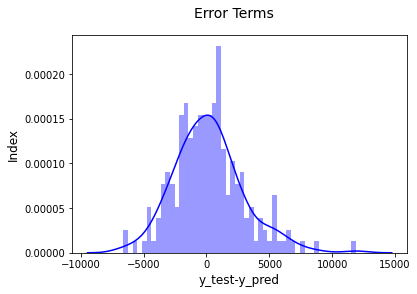

In [45]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50, color="blue")
fig.suptitle('Error Terms', fontsize=14)                  
plt.xlabel('y_test-y_pred', fontsize=12)                  
plt.ylabel('Index', fontsize=12)                          
plt.show()

# NEURAL NETWORK MODEL

700 observaciones


h(k+1)+h+1 = numero de parametros
h = nodos ocultos
k = nodos input (19 columnas)

Para tener 20 observaciones por parametro podemos tener maximo 700/20 = 35 parametros

h(k+1)+h+1 = 35

21h + 1 = 35
h = 1.6 nodos

In [46]:
def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics="mse")
  return model

In [47]:
n_cols = X_train.shape[1]

dnn_50 = build_and_compile_model(n_cols)
dnn_50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                506       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1150      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,707
Trainable params: 1,707
Non-trainable params: 0
_________________________________________________________________


# We have one imput layer with 22 features, next is the hidden layer with 50 nodes and finaly our output node

# now its time to train our NN

In [48]:


class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 ==0: print('')
        print('.', end='')
    
    
history = dnn_50.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [49]:
dnn_50.evaluate(X_train, y_train, verbose=0)

1791.477783203125

In [50]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [price]')
  plt.legend()
  plt.grid(True)


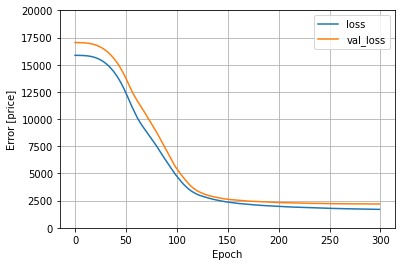

In [51]:
plot_loss(history)

# EARLY STOPPING

In [52]:


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

dnn_50_ES = build_and_compile_model(n_cols)
dnn_50_ES.summary()

history = dnn_50_ES.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[early_stop, PrintDot()])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1150      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 1,707
Trainable params: 1,707
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................
............................................................................................

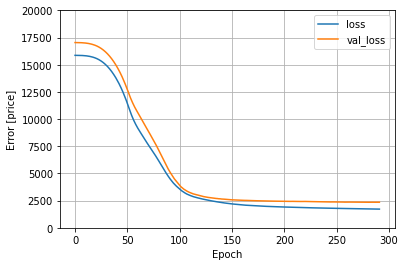

In [53]:
plot_loss(history)

In [54]:
dnn_50_ES.evaluate(X_train, y_train, verbose=0)

1844.1741943359375

In [55]:
dnn_50.evaluate(X_train, y_train, verbose=0)

1791.477783203125

In [56]:
dnn_50_y_pred = dnn_50.predict(X_test)

In [57]:
dnn_50_mse = mean_squared_error(y_test, dnn_50_y_pred)
dnn_50_mse 

8765061.765818648

In [58]:
dnn_50_ES_y_pred = dnn_50_ES.predict(X_test)
dnn_50_ES_mse = mean_squared_error(y_test, dnn_50_ES_y_pred)
dnn_50_ES_mse 

9149713.364297403

In [59]:
results_table = pd.DataFrame([[np.mean(lm_mse)],
                              [np.mean(dnn_50_mse)],
                             [np.mean(dnn_50_ES_mse)]],
                            columns=['MSE'],
                            index=["Linear Regression", "DNN 50", "DNN 50 Early Stop"])
pd.options.display.precision = 3
results_table

,MSE
Linear Regression,7.736e+06
DNN 50,8.765e+06
DNN 50 Early Stop,9.150e+06


In [60]:
pred_table = pd.DataFrame(columns=["Linear Regression: Predicted Price",
                                   "DNN 50: Predicted Price",
                                   "DNN 50 ES: Predicted Price",
                                  "Actual Price"])


In [61]:
pred_table["Linear Regression: Predicted Price"] = y_pred
pred_table["DNN 50: Predicted Price"] = dnn_50_y_pred
pred_table["DNN 50 ES: Predicted Price"] = dnn_50_ES_y_pred



In [62]:
pred_table.head()

,Linear Regression: Predicted Price,DNN 50: Predicted Price,DNN 50 ES: Predicted Price,Actual Price
0,9853.982,9972.099,9763.007,NaN
1,21457.982,17430.725,16907.346,NaN
2,24717.982,24032.967,25661.883,NaN
3,13053.982,11753.507,12707.736,NaN
4,28989.982,30994.453,31204.189,NaN


In [63]:
pred_table = pred_table.set_index(y_test.index)

In [64]:
pred_table["Actual Price"] = y_test


In [65]:
pred_table.head()

,Linear Regression: Predicted Price,DNN 50: Predicted Price,DNN 50 ES: Predicted Price,Actual Price
158,9853.982,9972.099,9763.007,10400
500,21457.982,17430.725,16907.346,19970
396,24717.982,24032.967,25661.883,24450
155,13053.982,11753.507,12707.736,11500
321,28989.982,30994.453,31204.189,32400


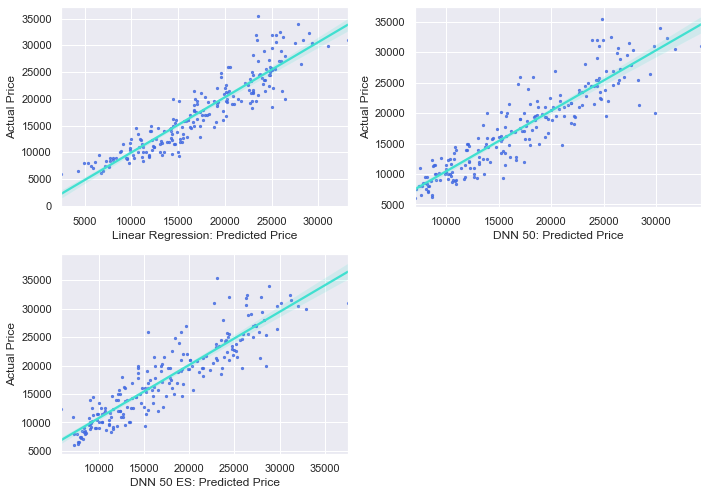

In [66]:
sns.set(color_codes=True)

fig = plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.regplot(x = 'Linear Regression: Predicted Price', y = 'Actual Price', data = pred_table,
            color = 'royalblue',scatter_kws={"s": 5}, line_kws={"color": "turquoise"})
plt.subplot(3,2,2)

sns.regplot(x = 'DNN 50: Predicted Price', y = 'Actual Price', data = pred_table,
            color = 'royalblue',scatter_kws={"s": 5}, line_kws={"color": "turquoise"})

plt.subplot(3,2,3)
sns.regplot(x = 'DNN 50 ES: Predicted Price', y = 'Actual Price', data = pred_table,
           color = 'royalblue',scatter_kws={"s": 5}, line_kws={"color": "turquoise"})


plt.tight_layout()
plt.show()

# CROSS VALIDATION

In [67]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [121]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(50, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [122]:


dnn_50_CS = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [123]:
history = dnn_50_CS.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [124]:
cv = KFold(n_splits=3, shuffle=True, random_state=1)



In [125]:
results = cross_val_score(dnn_50_CS, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.2s finished


In [126]:
abs(results)

array([7930664.80189381, 8044969.44505161, 9777005.50284326])

In [73]:
abs(results)

array([7081409.00291227, 7871872.65021475, 9130766.51040875])

In [ ]:
# CREATE A LOOP GOING TROUGH THE RANDOM STATE AND MAKE 4 GROUPS OF SPLITS

In [204]:
# BOX PLOT HE USES MEAN AS Y AXIS AND MODELS AS X AXIS

In [74]:
pred_table.head()

,Linear Regression: Predicted Price,DNN 50: Predicted Price,DNN 50 ES: Predicted Price,Actual Price
158,9853.982,9972.099,9763.007,10400
500,21457.982,17430.725,16907.346,19970
396,24717.982,24032.967,25661.883,24450
155,13053.982,11753.507,12707.736,11500
321,28989.982,30994.453,31204.189,32400


<AxesSubplot:>

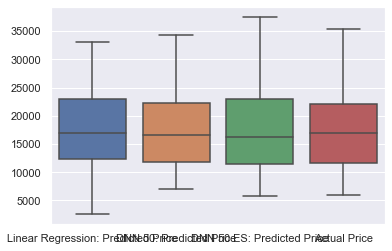

In [80]:
sns.boxplot(data=pred_table)

<AxesSubplot:>

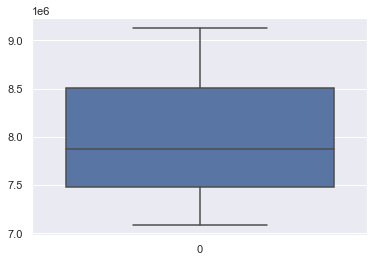

In [79]:
sns.boxplot(data=abs(results))

In [78]:
results

array([-7081409.00291227, -7871872.65021475, -9130766.51040875])

In [84]:
results = []

for i in range(1, 10):
    

    cv = KFold(n_splits=4, shuffle=True, random_state=i)

    results.append(cross_val_score(dnn_50_CS, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [88]:
abs(results[0])

array([ 7148942.22642444,  8121366.71615353,  8636177.0541739 ,
       10662628.98266465])

In [89]:
rez = pd.DataFrame(results)

In [95]:
rez = []

In [96]:
for i in results:
    for j in i:
        rez.append(abs(j))

<AxesSubplot:>

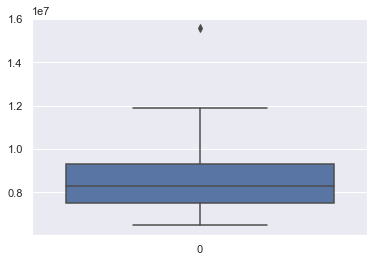

In [101]:
sns.boxplot(data=rez)

In [104]:
lm_rez = []
for i in range(1, 10):
    

    cv = KFold(n_splits=4, shuffle=True, random_state=i)

    lm_rez.append(cross_val_score(lm, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [129]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(40, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [130]:
dnn_40 = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)
dnn_40_ES = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [131]:
dnn_40_history = dnn_40.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [132]:
dnn_40_ES_history = dnn_40_ES.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [133]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(50, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [134]:
dnn_50 = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)
dnn_50_ES = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [135]:
dnn_50_history = dnn_50.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [136]:
dnn_50_ES_history = dnn_50_ES.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
..............................

In [137]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [138]:
dnn_2L = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)
dnn_2L_ES = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [139]:
dnn_2L_history = dnn_2L.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [140]:
dnn_2L_ES_history = dnn_2L_ES.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


...................................................................................................

In [146]:
models = [lm, dnn_40, dnn_40_ES, dnn_50, dnn_50_ES, dnn_2L, dnn_2L_ES]


In [194]:
final_results = []

for i in models:
    
    new_list =[]
    for j in range(1, 11):


        cv = KFold(n_splits=4, shuffle=True, random_state=j)

        new_list.append(cross_val_score(i, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))
    final_results.append(new_list)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.1s finished
[Parallel(n_jobs=1)]: Us

In [195]:
len(final_results)

7

-8749255.857159406
-8104194.644074319
-6869131.732431376
-9380801.827793315
-8576410.564805267
-5684398.446107445
-10181556.951964831
-7174093.702499402
-9188064.117634138
-6039443.001067501
-8403349.546048937
-7272559.080170427
-8486570.20820472
-7608817.667329742
-8019003.645187774
-7207663.818620909
-8482660.854696099
-10144951.651109658
-6481006.092765721
-7458763.607166151
-7197325.420039733
-8594749.823437152
-7995322.233524846
-8887306.889919143
-8248432.339042599
-7990557.745122907
-8801432.963648755
-7872837.925699418
-9311804.579417411
-8015528.473773034
-8978818.515190672
-6416519.887492277
-7363426.845979719
-8615221.493487708
-7465879.339510417
-13661021.556633303


In [196]:
lm_res, dnn_40_res, dnn_40_ES_res, dnn_50_res, dnn_50_ES_res, dnn_2_layers_res, dnn_2_layers_ES_res = ([] for i in range(7))

In [197]:
model_names = [lm_res, dnn_40_res, dnn_40_ES_res, dnn_50_res, dnn_50_ES_res, dnn_2_layers_res, dnn_2_layers_ES_res]

In [198]:
for i in range(7):
    for j in final_results[i]:
    
        for k in j:
            model_names[i].append(abs(k))

In [199]:
lm_res

[8749255.857159406,
 8104194.644074319,
 6869131.732431376,
 9380801.827793315,
 8576410.564805267,
 5684398.446107445,
 10181556.951964831,
 7174093.702499402,
 9188064.117634138,
 6039443.001067501,
 8403349.546048937,
 7272559.080170427,
 8486570.20820472,
 7608817.667329742,
 8019003.645187774,
 7207663.818620909,
 8482660.854696099,
 10144951.651109658,
 6481006.092765721,
 7458763.607166151,
 7197325.420039733,
 8594749.823437152,
 7995322.233524846,
 8887306.889919143,
 8248432.339042599,
 7990557.745122907,
 8801432.963648755,
 7872837.925699418,
 9311804.579417411,
 8015528.473773034,
 8978818.515190672,
 6416519.887492277,
 7363426.845979719,
 8615221.493487708,
 7465879.339510417,
 13661021.556633303,
 7949162.564546194,
 7363621.689402144,
 6949003.2172461385,
 10508753.981042178]

In [200]:
fin = [lm_res, dnn_40_res, dnn_40_ES_res, dnn_50_res, dnn_50_ES_res, dnn_2_layers_res, dnn_2_layers_ES_res]

In [201]:
fin

[[8749255.857159406,
  8104194.644074319,
  6869131.732431376,
  9380801.827793315,
  8576410.564805267,
  5684398.446107445,
  10181556.951964831,
  7174093.702499402,
  9188064.117634138,
  6039443.001067501,
  8403349.546048937,
  7272559.080170427,
  8486570.20820472,
  7608817.667329742,
  8019003.645187774,
  7207663.818620909,
  8482660.854696099,
  10144951.651109658,
  6481006.092765721,
  7458763.607166151,
  7197325.420039733,
  8594749.823437152,
  7995322.233524846,
  8887306.889919143,
  8248432.339042599,
  7990557.745122907,
  8801432.963648755,
  7872837.925699418,
  9311804.579417411,
  8015528.473773034,
  8978818.515190672,
  6416519.887492277,
  7363426.845979719,
  8615221.493487708,
  7465879.339510417,
  13661021.556633303,
  7949162.564546194,
  7363621.689402144,
  6949003.2172461385,
  10508753.981042178],
 [7381698.19215861,
  8394173.403308356,
  8710252.96656351,
  11881820.12312406,
  8643912.066746015,
  7332312.298691486,
  10133506.326124202,
  8794780

[[Text(0, 0, 'lm_res'),
  Text(1, 0, 'dnn_40_res'),
  Text(2, 0, 'dnn_40_ES_res'),
  Text(3, 0, 'dnn_50_res'),
  Text(4, 0, 'dnn_50_ES_res'),
  Text(5, 0, 'dnn_2_layers_res'),
  Text(6, 0, 'dnn_2_layers_ES_res')]]

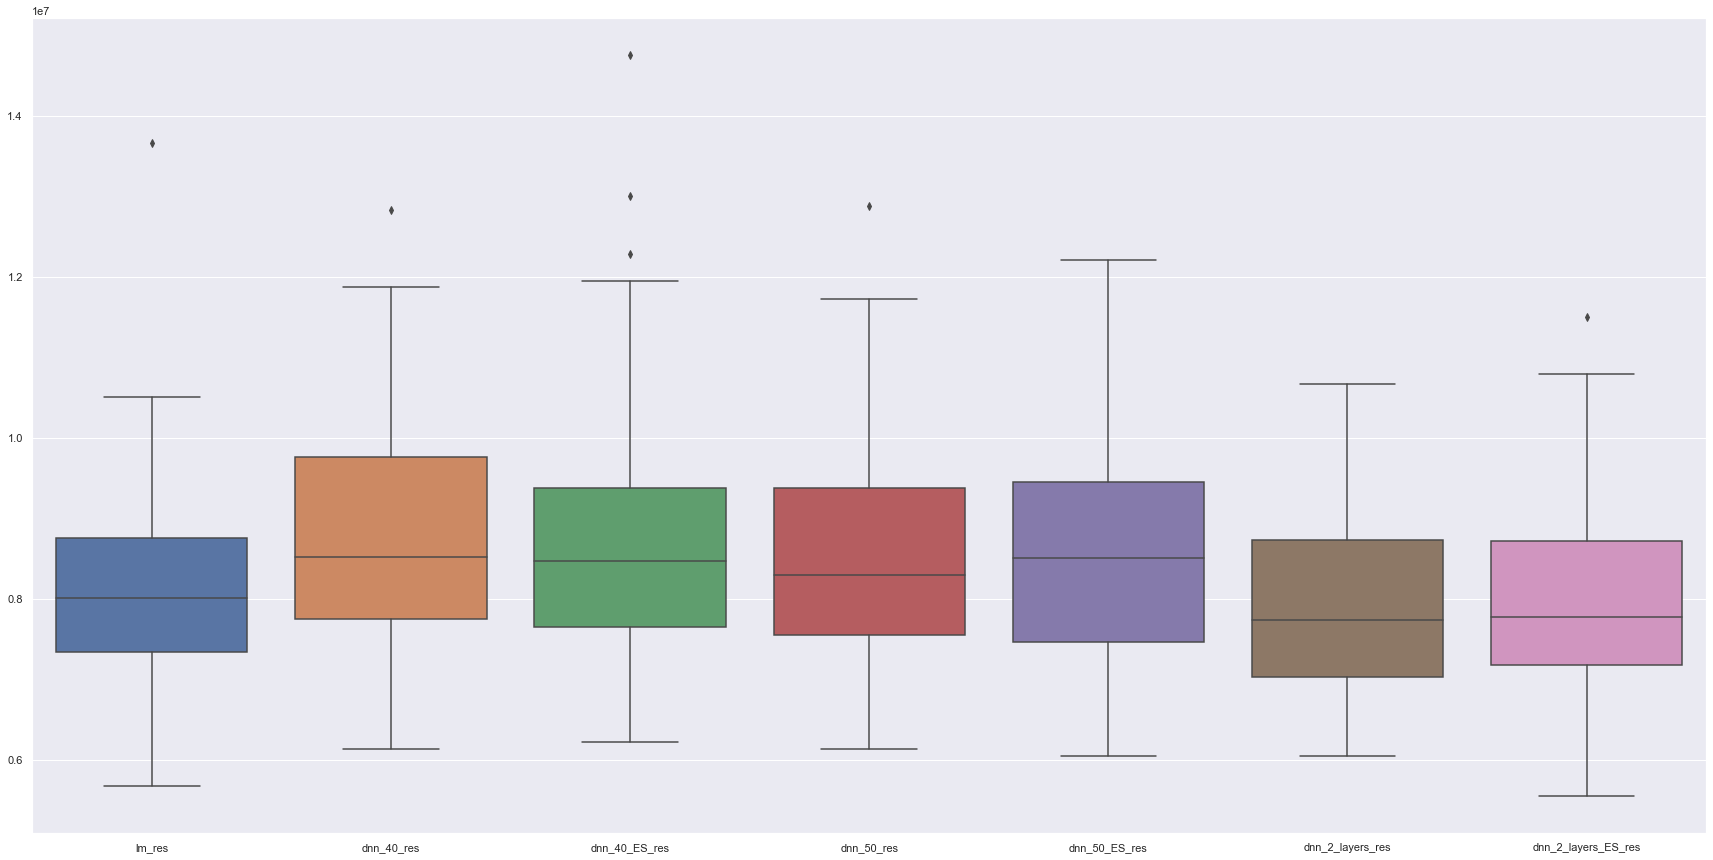

In [202]:




g = sns.boxplot(data=fin)
sns.set(rc={'figure.figsize':(30,15)})

g.set(xticklabels=['lm_res', 'dnn_40_res', 'dnn_40_ES_res', 'dnn_50_res', 'dnn_50_ES_res', 'dnn_2_layers_res', 'dnn_2_layers_ES_res'])



# ADD SAME MODELS WITH DIFFERENT ACTIVATION AND WITH DIFFERENT OPTIMIZERS

# THEN ADD MODELS WITH FEATURES FROM SAS AND THEN GRADIENT BOOST

# ADD TABLE FOR ALL MODELS AND THEIR MSE

In [204]:
df3.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,4 Series,2019,21998,Semi-Auto,15856,Diesel,145.0,65.7,2.0,BMW
1,3 Series,2019,24730,Semi-Auto,3049,Diesel,145.0,62.8,2.0,BMW
2,2 Series,2018,16980,Manual,19853,Diesel,150.0,64.2,2.0,BMW
3,2 Series,2017,23875,Semi-Auto,16261,Petrol,145.0,39.8,3.0,BMW
4,3 Series,2017,18000,Manual,20087,Petrol,165.0,44.8,2.0,BMW


In [205]:
final_sel_var = df3.drop(['model', 'tax', 'fuelType'], axis=1)

In [206]:
final_sel_var.head()

,year,price,transmission,mileage,mpg,engineSize,Make
0,2019,21998,Semi-Auto,15856,65.7,2.0,BMW
1,2019,24730,Semi-Auto,3049,62.8,2.0,BMW
2,2018,16980,Manual,19853,64.2,2.0,BMW
3,2017,23875,Semi-Auto,16261,39.8,3.0,BMW
4,2017,18000,Manual,20087,44.8,2.0,BMW


In [207]:
final_sel_var = pd.get_dummies(final_sel_var, columns=['year', 'transmission','Make'], prefix='', prefix_sep='')

In [208]:
final_sel_var.head()

,price,mileage,mpg,engineSize,2016,2017,2018,2019,2020,Automatic,Manual,Semi-Auto,BMW,Ford,Hyundai,audi,skoda,toyota,vw
0,21998,15856,65.7,2.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,24730,3049,62.8,2.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,16980,19853,64.2,2.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
3,23875,16261,39.8,3.0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
4,18000,20087,44.8,2.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [209]:
X = final_sel_var.drop('price', axis=1)
y= final_sel_var['price']

In [210]:
cols = X.columns

# Scale the features and convert it back to a dataframe
X = pd.DataFrame(scale(X))

# Write in the column names again
X.columns = cols
X

,mileage,mpg,engineSize,2016,2017,2018,2019,2020,Automatic,Manual,Semi-Auto,BMW,Ford,Hyundai,audi,skoda,toyota,vw
0,-0.157,0.807,0.873,-0.469,-0.630,-0.446,1.448,-0.222,-0.536,-1.161,1.982,2.449,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408
1,-0.928,0.576,0.873,-0.469,-0.630,-0.446,1.448,-0.222,-0.536,-1.161,1.982,2.449,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408
2,0.084,0.688,0.873,-0.469,-0.630,2.244,-0.691,-0.222,-0.536,0.861,-0.504,2.449,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408
3,-0.133,-1.254,2.981,-0.469,1.587,-0.446,-0.691,-0.222,-0.536,-1.161,1.982,2.449,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408
4,0.098,-0.856,0.873,-0.469,1.587,-0.446,-0.691,-0.222,-0.536,0.861,-0.504,2.449,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.494,-1.015,2.981,2.134,-0.630,-0.446,-0.691,-0.222,1.867,-1.161,-0.504,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408,2.449
696,-0.786,-0.259,-1.235,-0.469,-0.630,-0.446,1.448,-0.222,-0.536,0.861,-0.504,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408,2.449
697,0.291,-0.180,-0.181,-0.469,-0.630,2.244,-0.691,-0.222,-0.536,0.861,-0.504,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408,2.449
698,0.115,0.266,-1.235,-0.469,1.587,-0.446,-0.691,-0.222,-0.536,0.861,-0.504,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408,2.449


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )


In [214]:
X.columns

Index(['mileage', 'mpg', 'engineSize', '2016', '2017', '2018', '2019', '2020',
       'Automatic', 'Manual', 'Semi-Auto', 'BMW', 'Ford', 'Hyundai', 'audi',
       'skoda', 'toyota', 'vw'],
      dtype='object')

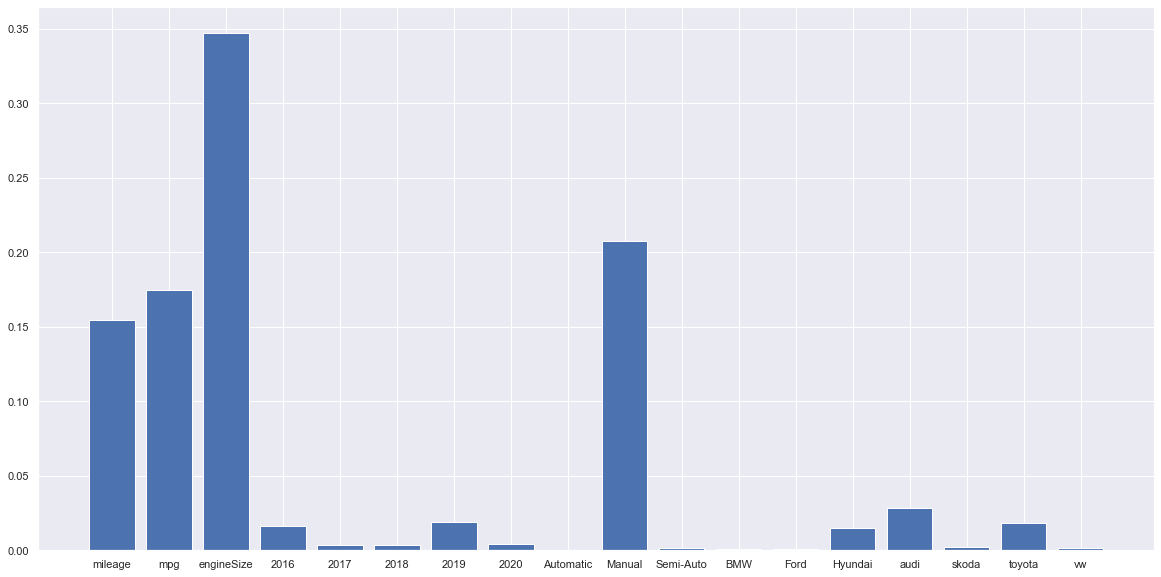

In [215]:
#More feature importance visualisation

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train.values.ravel())

fig = plt.figure(figsize=(20,10))
plt.bar(range(X_train.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train.shape[1]), ['mileage', 'mpg', 'engineSize', '2016', '2017', '2018', '2019', '2020',
       'Automatic', 'Manual', 'Semi-Auto', 'BMW', 'Ford', 'Hyundai', 'audi',
       'skoda', 'toyota', 'vw'])
plt.show()

In [216]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
confidance_linear = lm.score(X_test, y_test)
confidance_linear

0.8285824006319238

In [217]:
SV_lm_mse = mean_squared_error(y_test, y_pred)
SV_lm_mse

8364456.640633011

In [218]:
lm_rez_SV = []
for i in range(1, 10):
    

    cv = KFold(n_splits=4, shuffle=True, random_state=i)

    lm_rez_SV.append(cross_val_score(lm, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [219]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(40, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [220]:
SEdnn_40 = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)
SEdnn_40_ES = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [221]:
SEdnn_40_history = SEdnn_40.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [222]:
SEdnn_40_ES_history = SEdnn_40_ES.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [223]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(50, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [224]:
SEdnn_50 = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)
SEdnn_50_ES = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [225]:
SEdnn_50_history = SEdnn_50.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [226]:
SEdnn_50_ES_history = SEdnn_50_ES.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [227]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [228]:
SEdnn_2L = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)
SEdnn_2L_ES = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [229]:
SEdnn_2L_history = SEdnn_2L.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [230]:
SEdnn_2L_ES_history = SEdnn_2L_ES.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


....................................................................................................
.................................................

In [231]:
models = [lm, SEdnn_40, SEdnn_40_ES, SEdnn_50, SEdnn_50_ES, SEdnn_2L, SEdnn_2L_ES]


In [232]:
final_results_selected_var = []

for i in models:
    
    new_list =[]
    for j in range(1, 11):


        cv = KFold(n_splits=4, shuffle=True, random_state=j)

        new_list.append(cross_val_score(i, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))
    final_results_selected_var.append(new_list)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.5s finished
[Parallel(n_jobs=1)]: Us

In [233]:
SVlm_res, SVdnn_40_res, SVdnn_40_ES_res, SVdnn_50_res, SVdnn_50_ES_res, SVdnn_2_layers_res, SVdnn_2_layers_ES_res = ([] for i in range(7))

In [234]:
model_names_SV = [SVlm_res, SVdnn_40_res, SVdnn_40_ES_res, SVdnn_50_res, SVdnn_50_ES_res, SVdnn_2_layers_res, SVdnn_2_layers_ES_res]

In [235]:
for i in range(7):
    for j in final_results_selected_var[i]:
    
        for k in j:
            model_names_SV[i].append(abs(k))

In [236]:
fin_SV = [SVlm_res, SVdnn_40_res, SVdnn_40_ES_res, SVdnn_50_res, SVdnn_50_ES_res, SVdnn_2_layers_res, SVdnn_2_layers_ES_res]

[[Text(0, 0, 'lm_res_SV'),
  Text(1, 0, 'dnn_40_res_SV'),
  Text(2, 0, 'dnn_40_ES_res_SV'),
  Text(3, 0, 'dnn_50_res_SV'),
  Text(4, 0, 'dnn_50_ES_res_SV'),
  Text(5, 0, 'dnn_2_layers_res_SV'),
  Text(6, 0, 'dnn_2_layers_ES_res_SV')]]

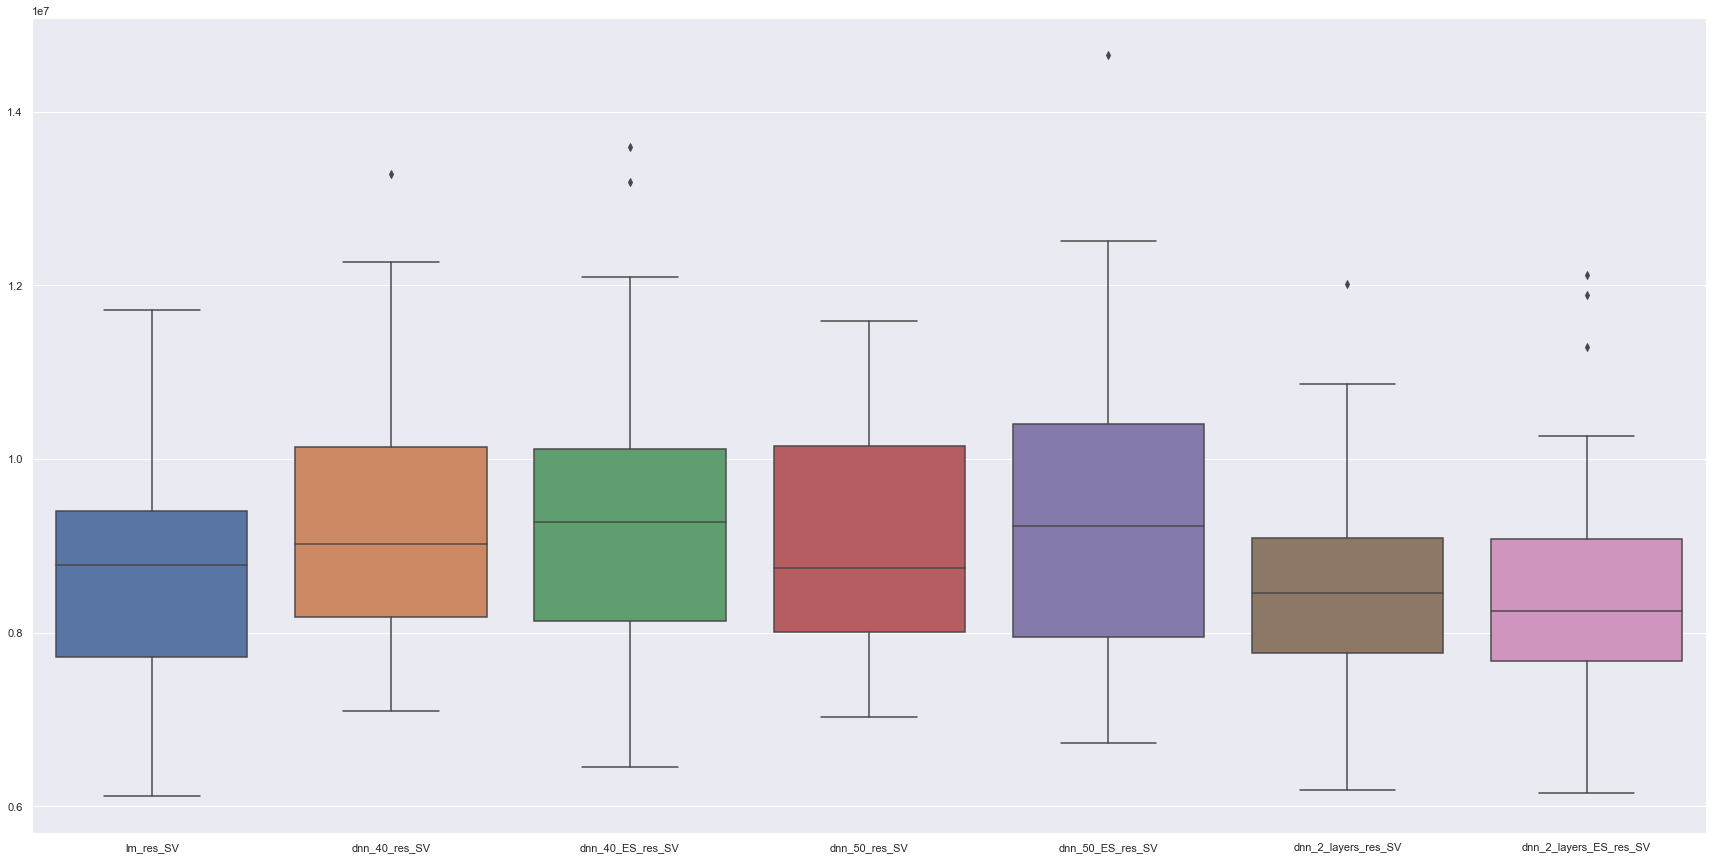

In [237]:
g = sns.boxplot(data=fin_SV)
sns.set(rc={'figure.figsize':(30,15)})

g.set(xticklabels=['lm_res_SV', 'dnn_40_res_SV', 'dnn_40_ES_res_SV', 'dnn_50_res_SV', 'dnn_50_ES_res_SV', 'dnn_2_layers_res_SV', 'dnn_2_layers_ES_res_SV'])



In [238]:
union = [lm_res, SVlm_res,dnn_40_res, dnn_40_res, SVdnn_40_res, dnn_40_ES_res, SVdnn_40_ES_res, dnn_50_res, SVdnn_50_res, dnn_50_ES_res, SVdnn_50_ES_res, dnn_2_layers_res, SVdnn_2_layers_res, dnn_2_layers_ES_res, SVdnn_2_layers_ES_res]

[[Text(0, 0, 'lm_res'),
  Text(1, 0, 'SVlm_res'),
  Text(2, 0, 'dnn_40_res'),
  Text(3, 0, 'SVdnn_40_res'),
  Text(4, 0, 'dnn_40_ES_res'),
  Text(5, 0, 'SVdnn_40_ES_res'),
  Text(6, 0, 'dnn_50_res'),
  Text(7, 0, 'SVdnn_50_res'),
  Text(8, 0, 'dnn_50_ES_res'),
  Text(9, 0, 'SVdnn_50_ES_res'),
  Text(10, 0, 'dnn_2_layers_res'),
  Text(11, 0, 'SVdnn_2_layers_res'),
  Text(12, 0, 'dnn_2_layers_ES_res'),
  Text(13, 0, 'SVdnn_2_layers_ES_res')]]

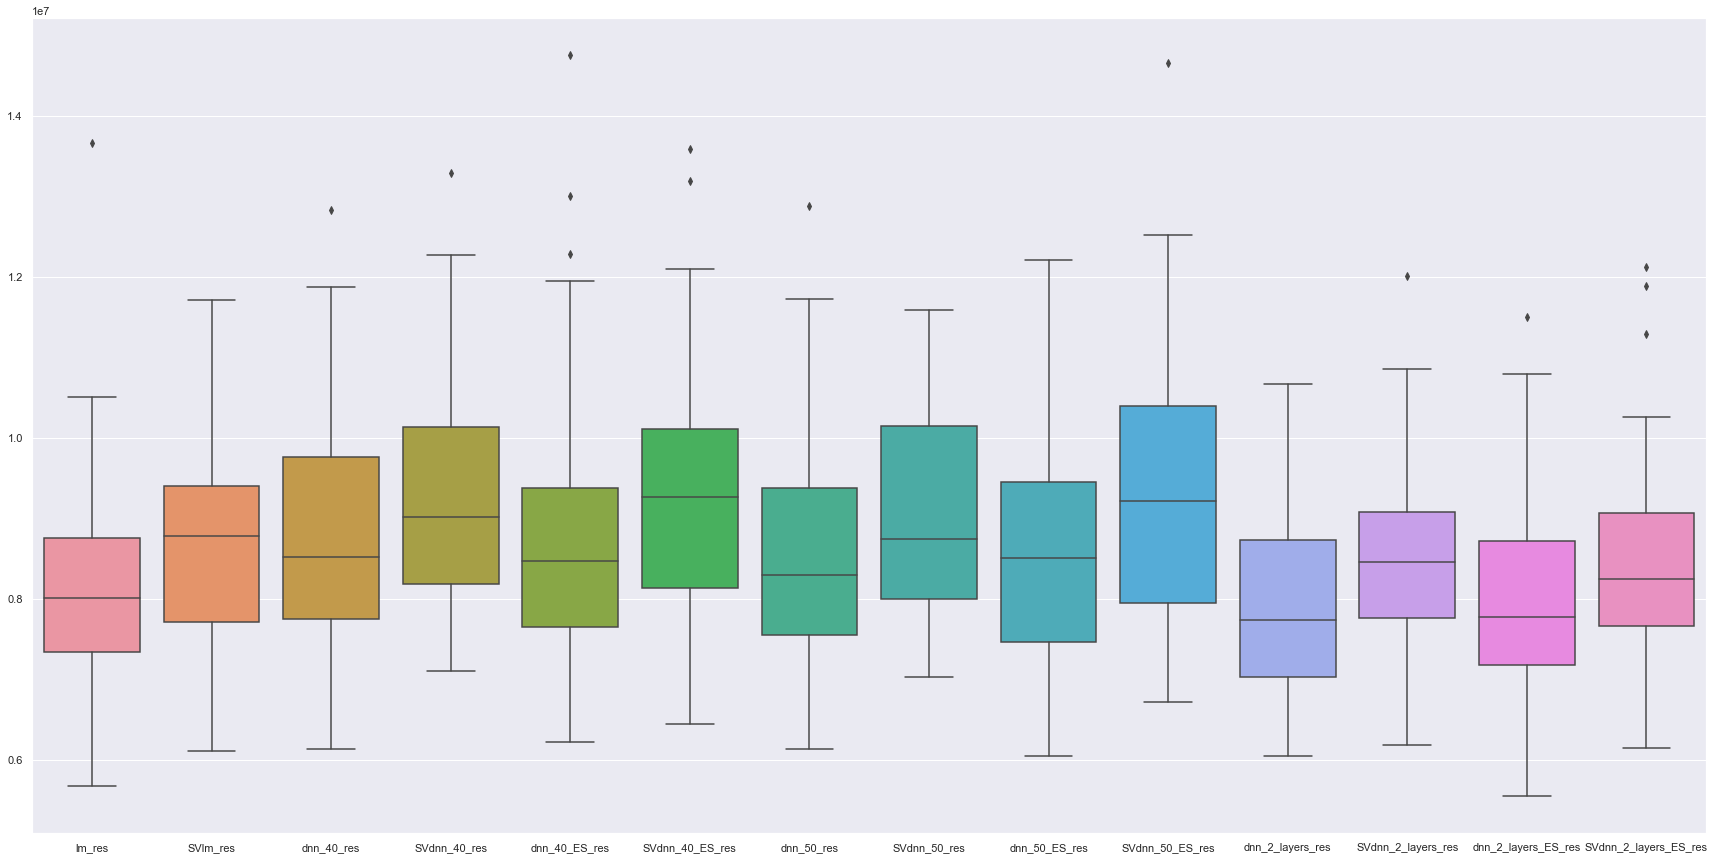

In [355]:
union = [lm_res, SVlm_res, dnn_40_res, SVdnn_40_res, dnn_40_ES_res, SVdnn_40_ES_res, dnn_50_res, SVdnn_50_res, dnn_50_ES_res, SVdnn_50_ES_res, dnn_2_layers_res, SVdnn_2_layers_res, dnn_2_layers_ES_res, SVdnn_2_layers_ES_res]

g = sns.boxplot(data=union)
sns.set(rc={'figure.figsize':(30,15)})

g.set(xticklabels=['lm_res', 'SVlm_res', 'dnn_40_res', 'SVdnn_40_res', 'dnn_40_ES_res', 'SVdnn_40_ES_res', 'dnn_50_res', 'SVdnn_50_res', 'dnn_50_ES_res', 'SVdnn_50_ES_res', 'dnn_2_layers_res', 'SVdnn_2_layers_res', 'dnn_2_layers_ES_res', 'SVdnn_2_layers_ES_res'])


# JUST 1 NN CHECK WITH ALL EXAMPLES TO SEE HOW DO THE MODELS PERFORM WITH CHANGES


In [360]:
# FULL DATA

X = final.drop('price', axis=1)
y= final['price']

cols = X.columns

# Scale the features and convert it back to a dataframe
X = pd.DataFrame(scale(X))

# Write in the column names again
X.columns = cols

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )


In [368]:
# STANDARD

def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


n_cols = X_train.shape[1]
dnn_50 = build_and_compile_model(n_cols)


history = dnn_50.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [369]:
dnn_50_y_pred = dnn_50.predict(X_test)
dnn_50_mse = mean_squared_error(y_test, dnn_50_y_pred)
dnn_50_mse

8647350.52679792

In [348]:
dnn_50.summary()

Model: "sequential_970"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3218 (Dense)           (None, 22)                506       
_________________________________________________________________
dense_3219 (Dense)           (None, 50)                1150      
_________________________________________________________________
dense_3220 (Dense)           (None, 1)                 51        
Total params: 1,707
Trainable params: 1,707
Non-trainable params: 0
_________________________________________________________________


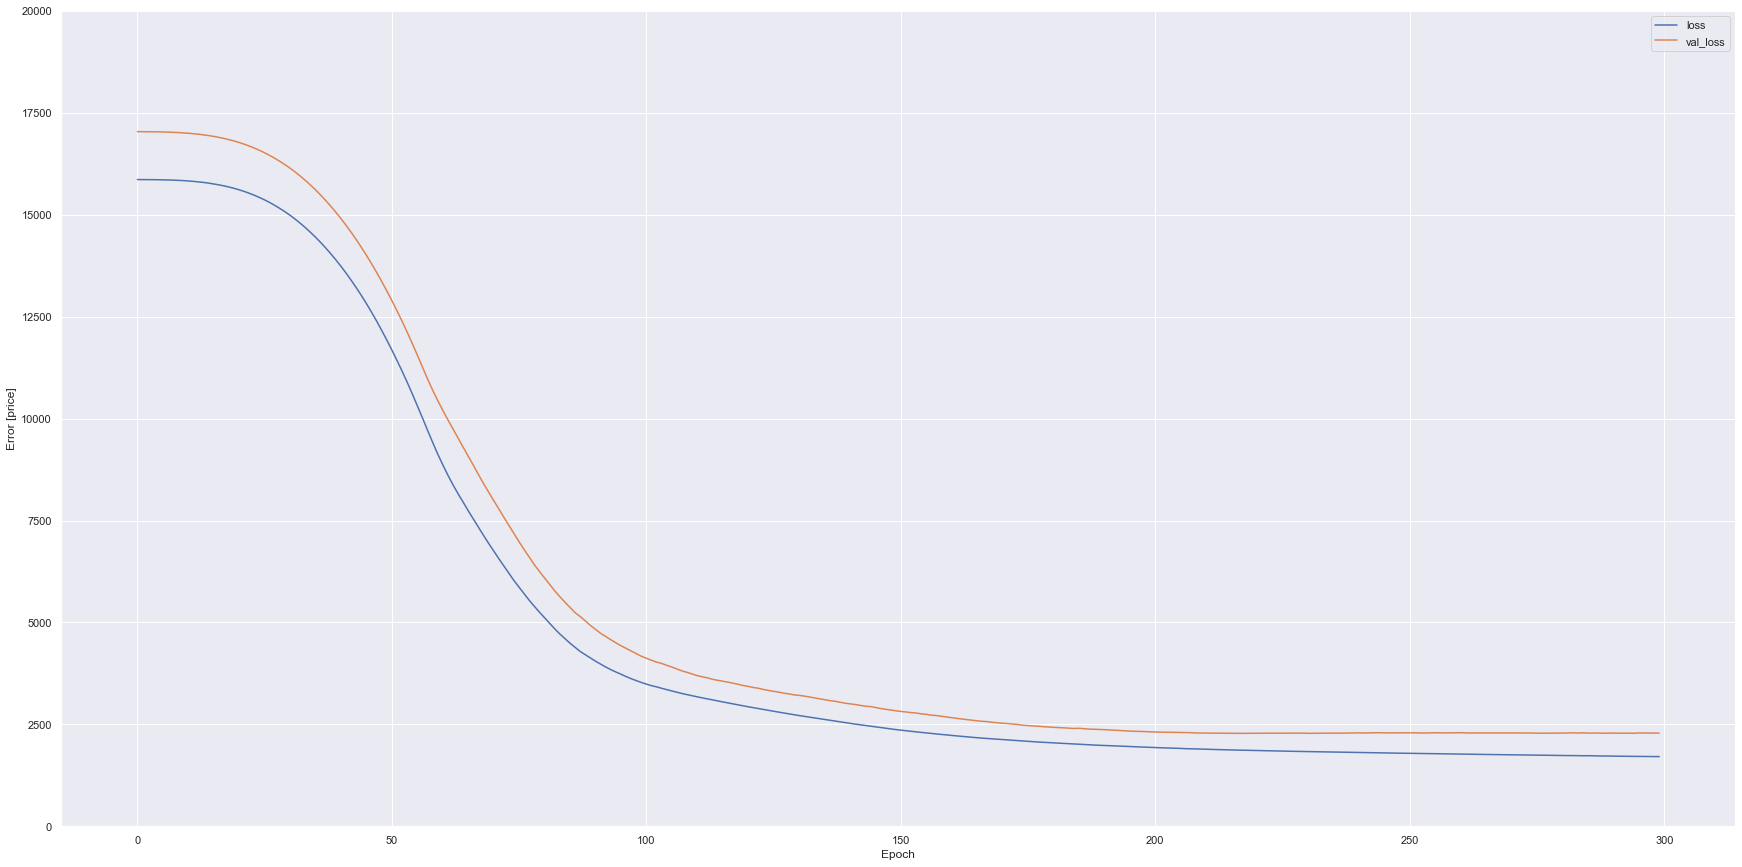

In [247]:
plot_loss(history)


....................................................................................................
....................................................................................................
....................................................................................................

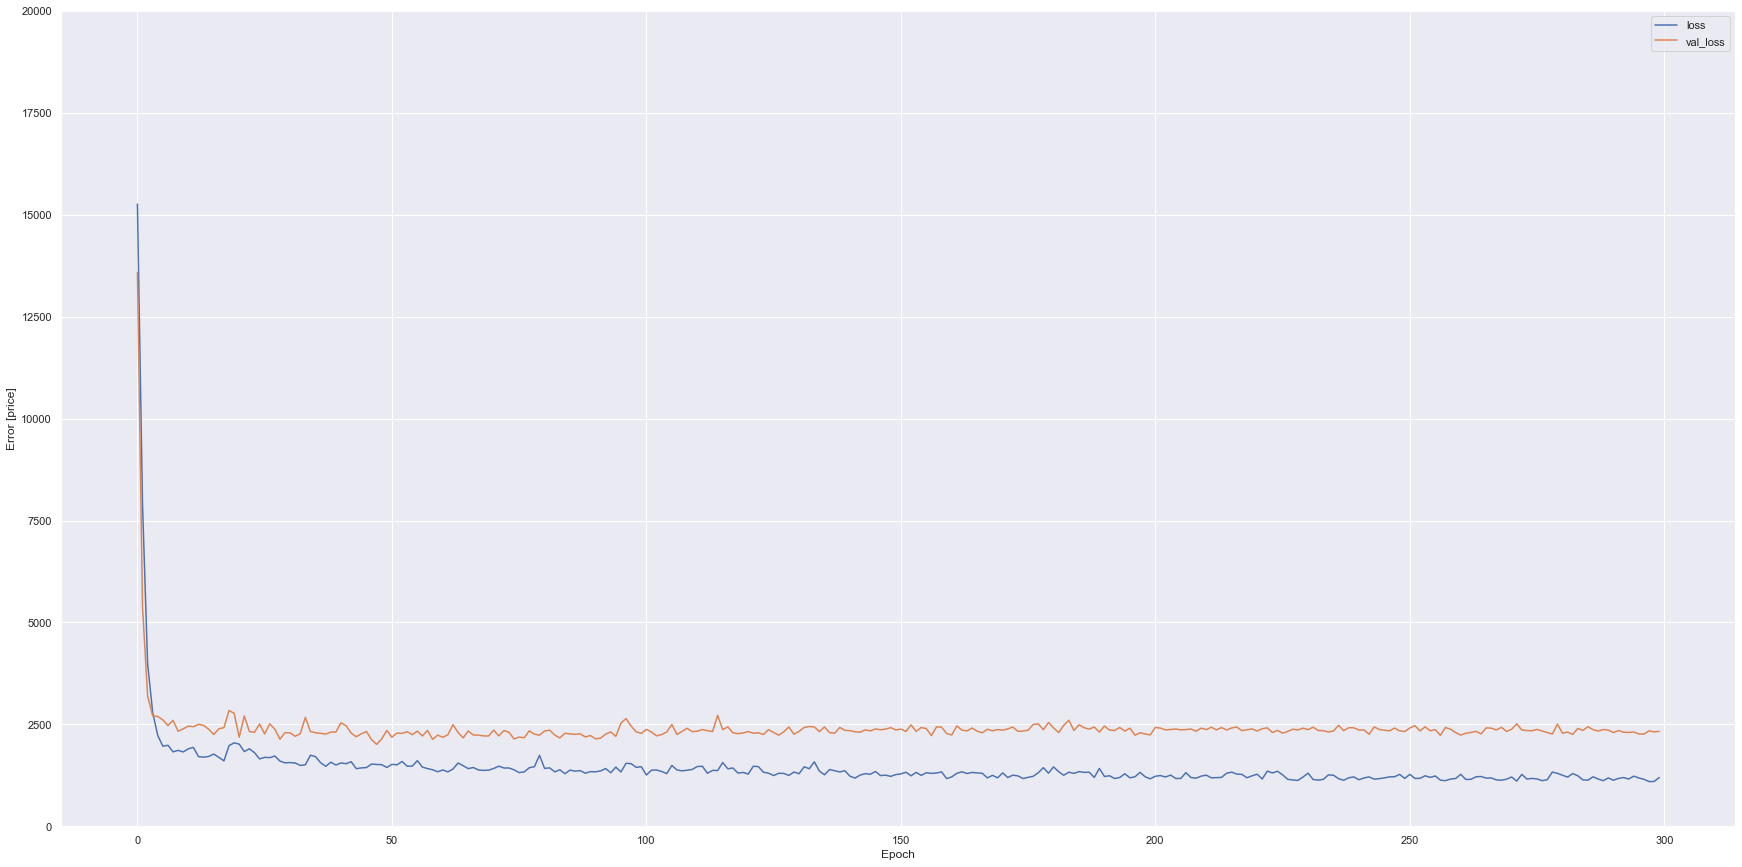

In [248]:
# BIGGER OPTIMIZER

def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.1))
  return model


n_cols = X_train.shape[1]
dnn_50_V1 = build_and_compile_model(n_cols)


history = dnn_50_V1.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])

dnn_50_V1_y_pred = dnn_50_V1.predict(X_test)
dnn_50_V1_mse = mean_squared_error(y_test, dnn_50_V1_y_pred)
dnn_50_V1_mse

plot_loss(history)

In [249]:
dnn_50_V1_mse

9141606.229329508


....................................................................................................
....................................................................................................
....................................................................................................

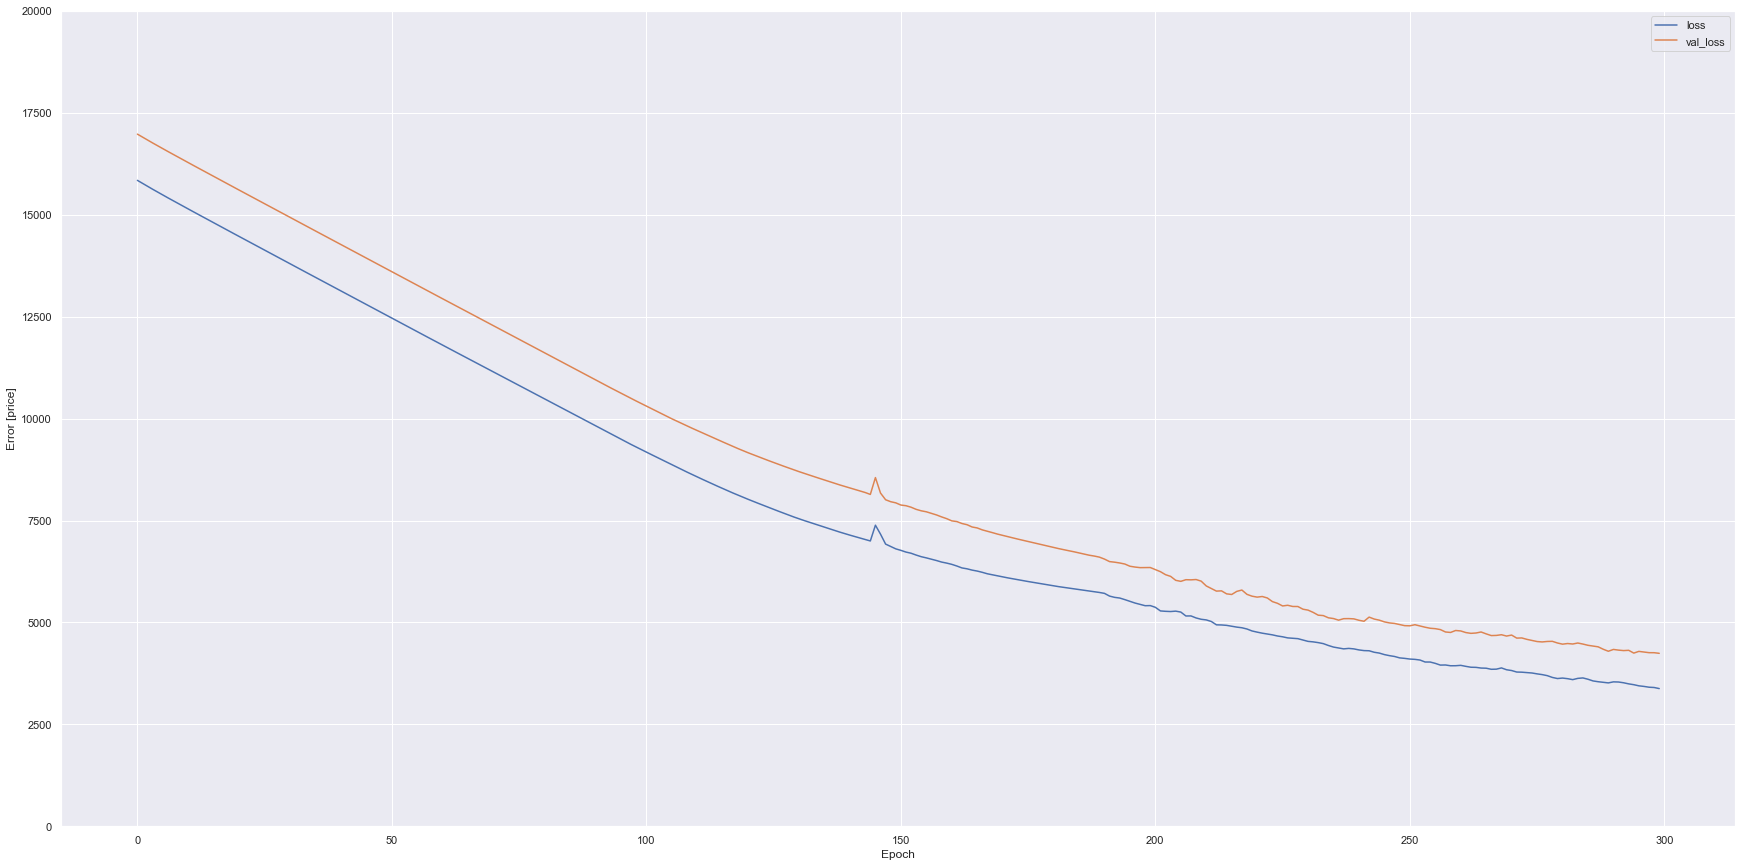

In [256]:
# CHANGE ACTIVATION  TANH

def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='tanh'),
      layers.Dense(50, activation='tanh'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.1))
  return model


n_cols = X_train.shape[1]
dnn_50_V2 = build_and_compile_model(n_cols)


history = dnn_50_V2.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])

dnn_50_V2_y_pred = dnn_50_V2.predict(X_test)
dnn_50_V2_mse = mean_squared_error(y_test, dnn_50_V2_y_pred)
dnn_50_V2_mse

plot_loss(history)

In [257]:
dnn_50_V2_mse

42340498.3102116


....................................................................................................
....................................................................................................
....................................................................................................

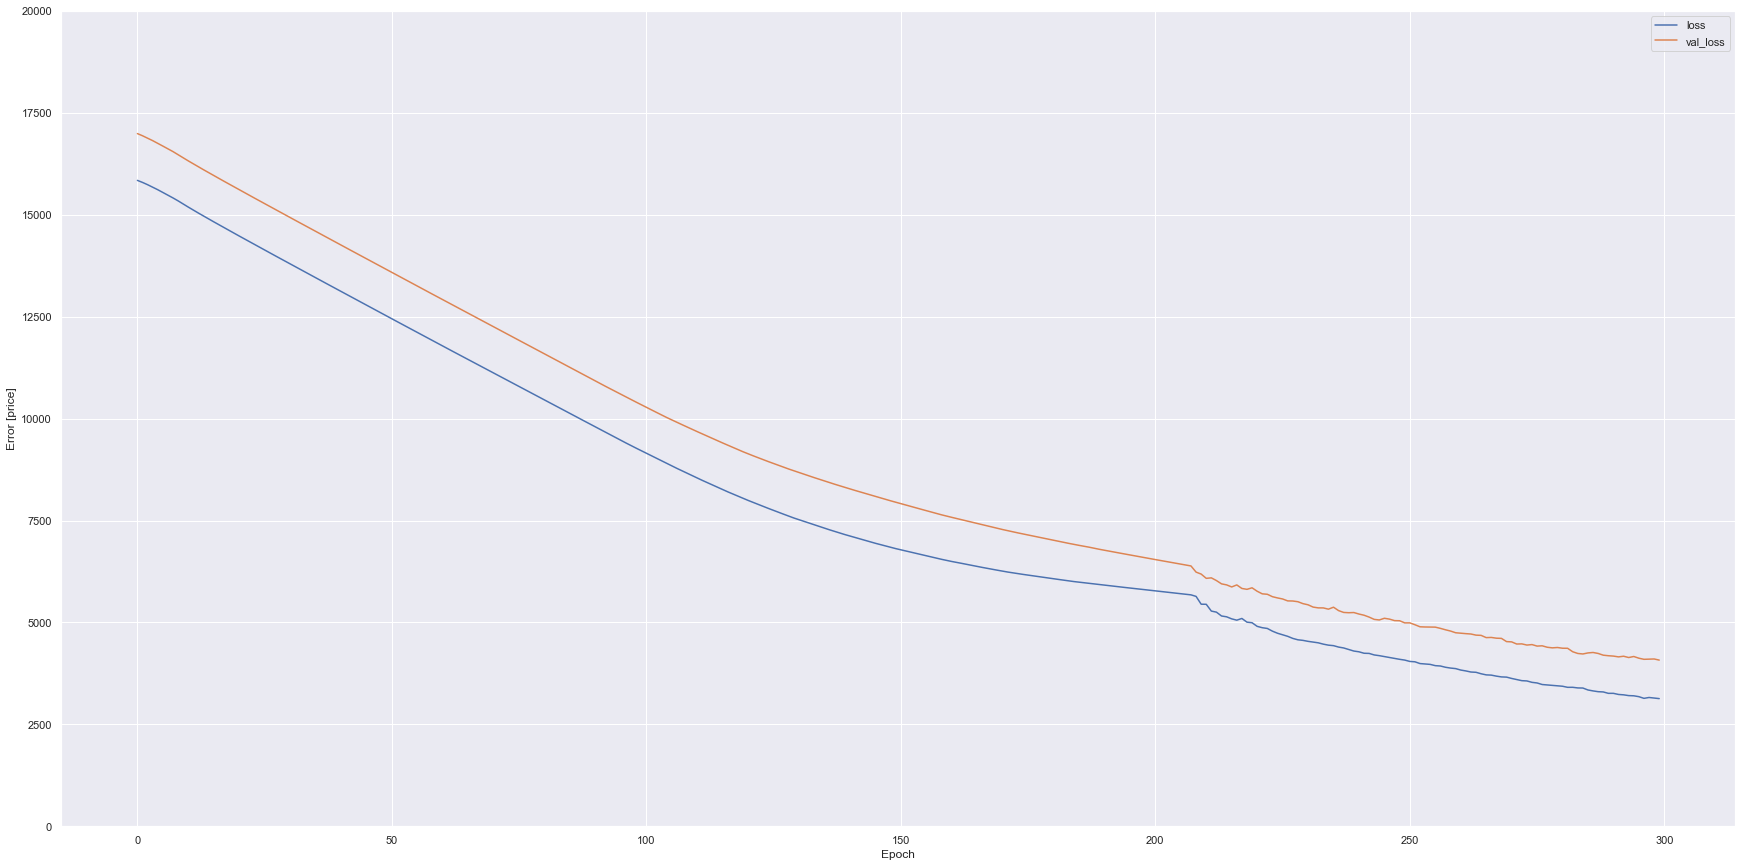

In [258]:
# CHANGE ACTIVATION  sigmoid

def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='sigmoid'),
      layers.Dense(50, activation='sigmoid'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.1))
  return model


n_cols = X_train.shape[1]
dnn_50_V3 = build_and_compile_model(n_cols)


history = dnn_50_V3.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])

dnn_50_V3_y_pred = dnn_50_V3.predict(X_test)
dnn_50_V3_mse = mean_squared_error(y_test, dnn_50_V3_y_pred)
dnn_50_V3_mse

plot_loss(history)

In [259]:
dnn_50_V3_mse

41098769.3819595


....................................................................................................
....................................................................................................
....................................................................................................

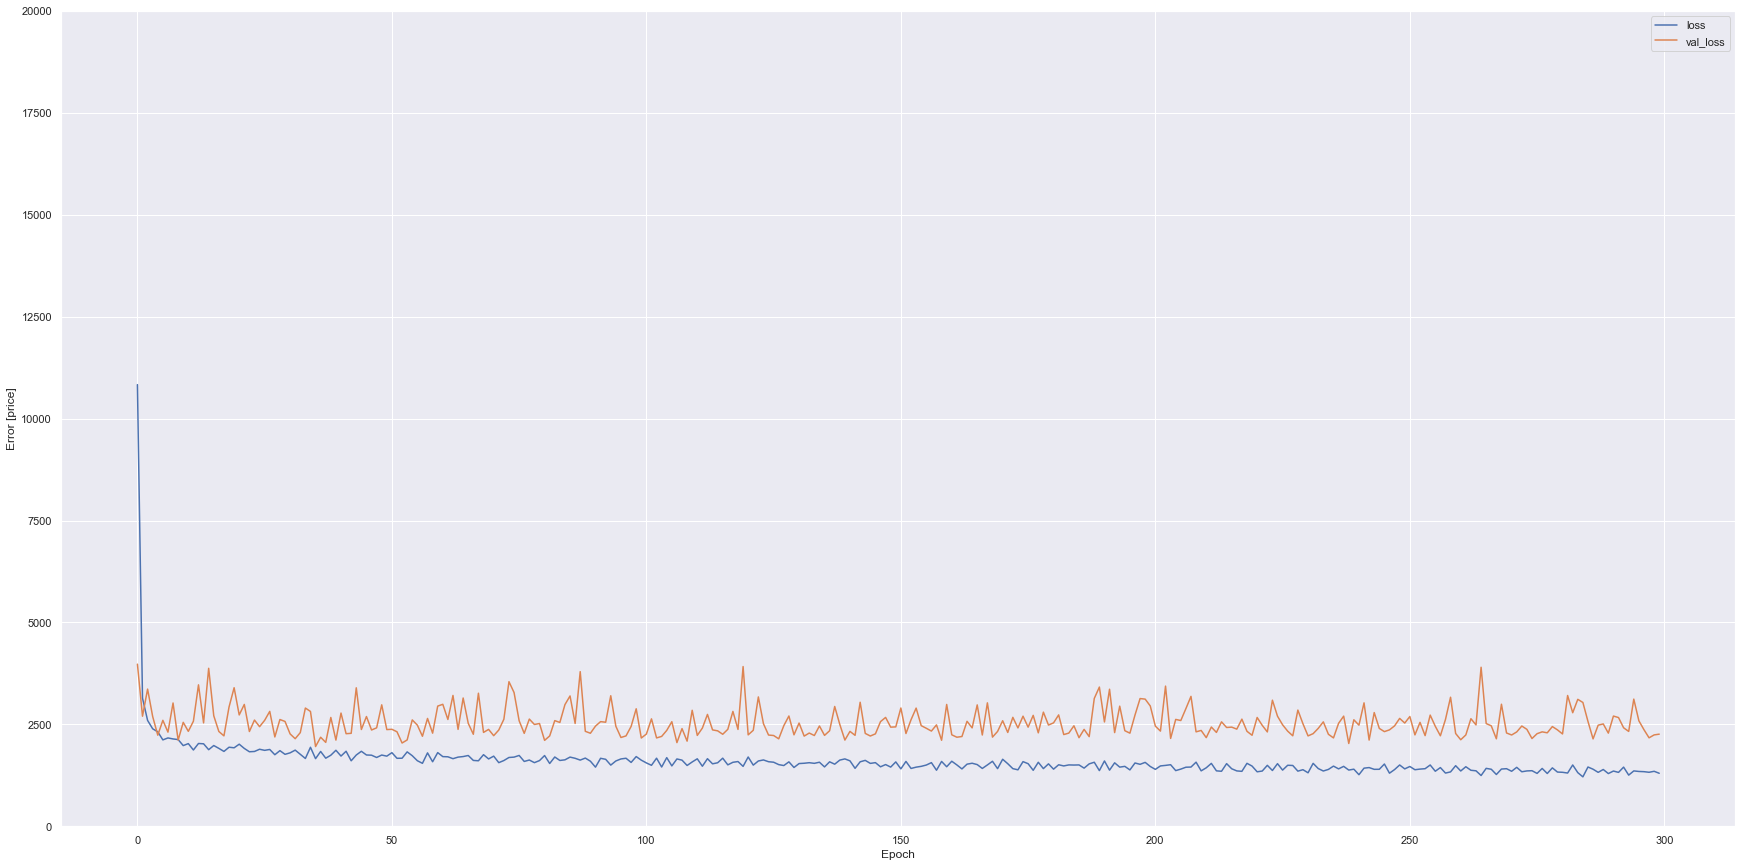

In [260]:
# CHANGE optimizer  RMSprop

def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.RMSprop(0.1))
  return model


n_cols = X_train.shape[1]
dnn_50_V4 = build_and_compile_model(n_cols)


history = dnn_50_V4.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])

dnn_50_V4_y_pred = dnn_50_V4.predict(X_test)
dnn_50_V4_mse = mean_squared_error(y_test, dnn_50_V4_y_pred)
dnn_50_V4_mse

plot_loss(history)

In [261]:
dnn_50_V4_mse

8614803.676950647


....................................................................................................
....................................................................................................
....................................................................................................

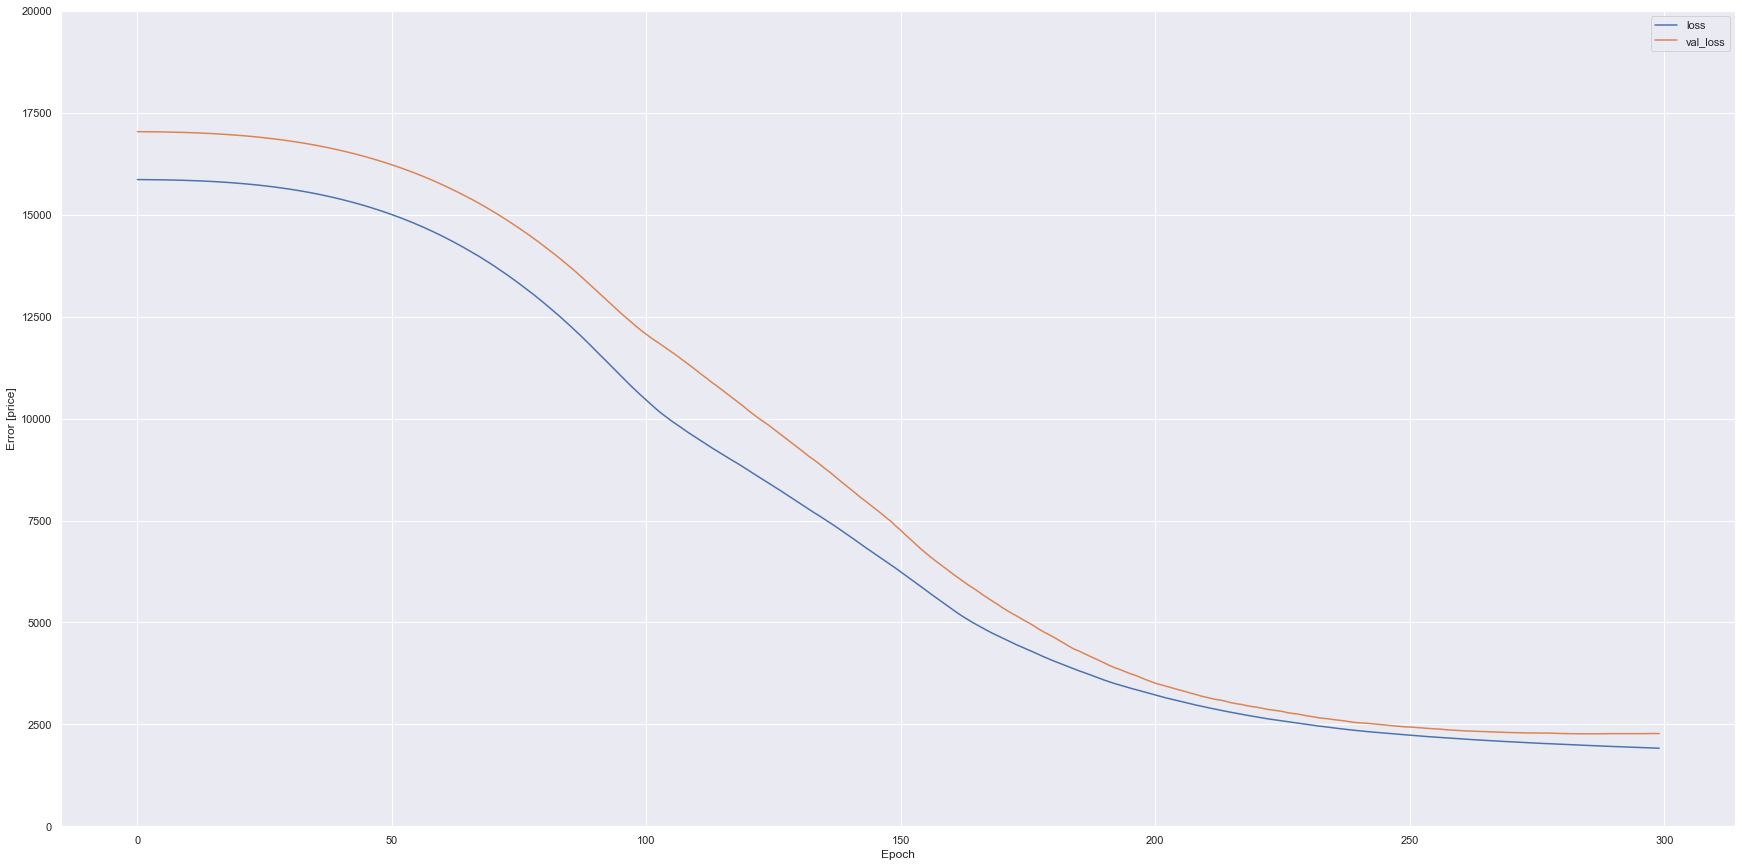

In [262]:
# CHANGE optimizer  RMSprop and learning rate

def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001))
  return model


n_cols = X_train.shape[1]
dnn_50_V5 = build_and_compile_model(n_cols)


history = dnn_50_V5.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])

dnn_50_V5_y_pred = dnn_50_V5.predict(X_test)
dnn_50_V5_mse = mean_squared_error(y_test, dnn_50_V5_y_pred)
dnn_50_V5_mse

plot_loss(history)

In [263]:
dnn_50_V5_mse

9492077.324429603


....................................................................................................
....................................................................................................
....................................................................................................

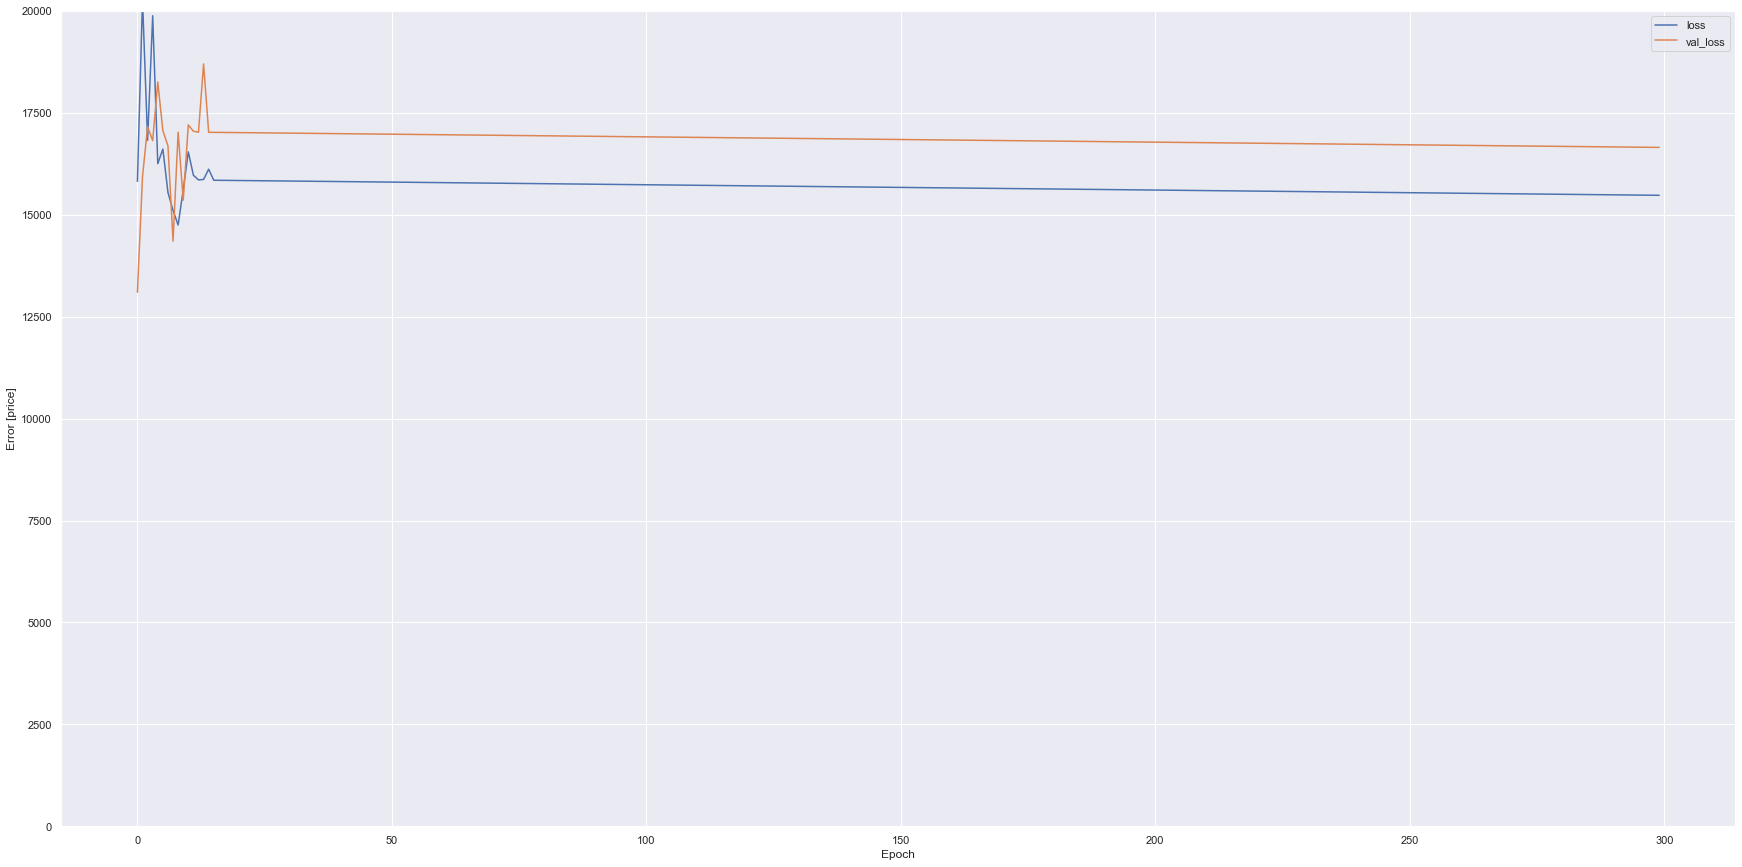

In [264]:
# CHANGE optimizer  SGD

def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.SGD(0.1))
  return model


n_cols = X_train.shape[1]
dnn_50_V6 = build_and_compile_model(n_cols)


history = dnn_50_V6.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])

dnn_50_V6_y_pred = dnn_50_V6.predict(X_test)
dnn_50_V6_mse = mean_squared_error(y_test, dnn_50_V6_y_pred)
dnn_50_V6_mse

plot_loss(history)

In [265]:
dnn_50_V6_mse


342335167.5063594


....................................................................................................
....................................................................................................
....................................................................................................

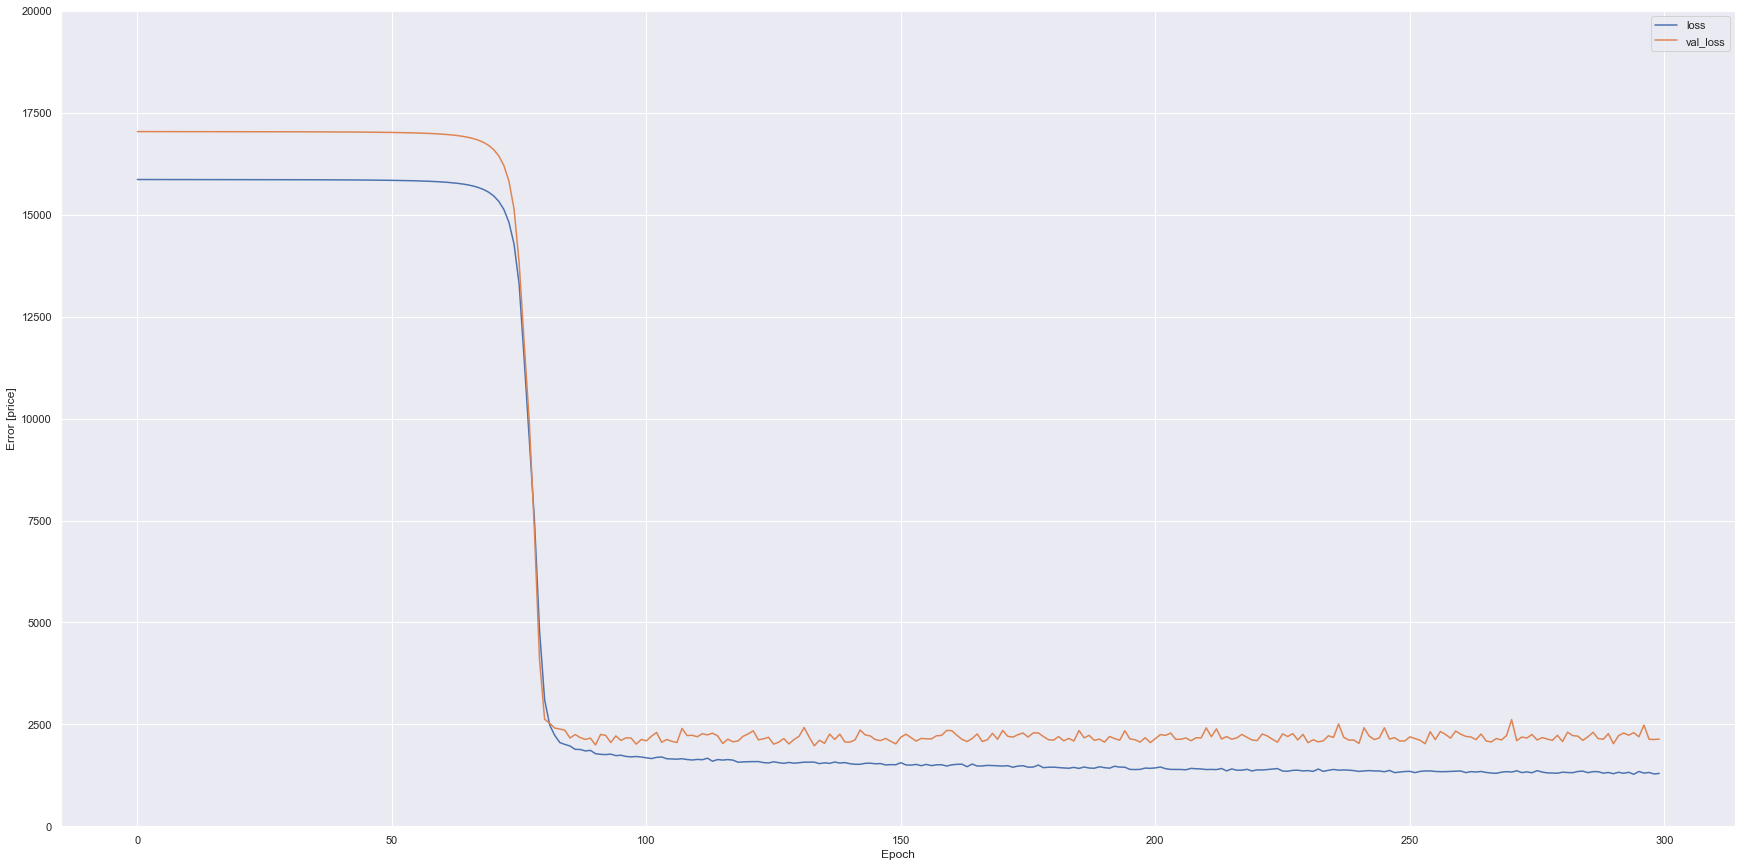

In [266]:
# CHANGE optimizer  SGD and learning rate

def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.SGD(0.001))
  return model


n_cols = X_train.shape[1]
dnn_50_V7 = build_and_compile_model(n_cols)


history = dnn_50_V7.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[PrintDot()])

dnn_50_V7_y_pred = dnn_50_V7.predict(X_test)
dnn_50_V7_mse = mean_squared_error(y_test, dnn_50_V7_y_pred)
dnn_50_V7_mse

plot_loss(history)

In [267]:
dnn_50_V7_mse

7980822.867549223

In [370]:
results_table = pd.DataFrame([[np.mean(lm_mse)],
                              [np.mean(dnn_50_mse)],
                             [np.mean(dnn_50_V1_mse)],
                              [np.mean(dnn_50_V2_mse)],
                              [np.mean(dnn_50_V4_mse)],
                              [np.mean(dnn_50_V5_mse)],
                              [np.mean(dnn_50_V6_mse)],
                              [np.mean(dnn_50_V7_mse)],                             
                             ],
                            columns=['MSE'],
                            index=["Linear Regression", 
                                   "DNN 50 Adam 0.001",
                                   "DNN 50 Adam 0.1",
                                    "DNN 50 Tanh 0.1",
                                    "DNN 50 RMSProp 0.1",
                                    "DNN 50 RMSProp 0.001",
                                   "DNN 50 SGD 0.1",
                                   "DNN 50 SGD 0.001"
                                   
                                  ])
pd.options.display.precision = 3
results_table

,MSE
Linear Regression,8.364e+06
DNN 50 Adam 0.001,8.647e+06
DNN 50 Adam 0.1,9.142e+06
DNN 50 Tanh 0.1,4.234e+07
DNN 50 RMSProp 0.1,8.615e+06
DNN 50 RMSProp 0.001,9.492e+06
DNN 50 SGD 0.1,3.423e+08
DNN 50 SGD 0.001,7.981e+06


In [270]:
results_table['MSE'].min()


7980822.867549223

In [371]:
results_table.sort_values(by='MSE', ascending=True)

,MSE
DNN 50 SGD 0.001,7.981e+06
Linear Regression,8.364e+06
DNN 50 RMSProp 0.1,8.615e+06
DNN 50 Adam 0.001,8.647e+06
DNN 50 Adam 0.1,9.142e+06
DNN 50 RMSProp 0.001,9.492e+06
DNN 50 Tanh 0.1,4.234e+07
DNN 50 SGD 0.1,3.423e+08



....................

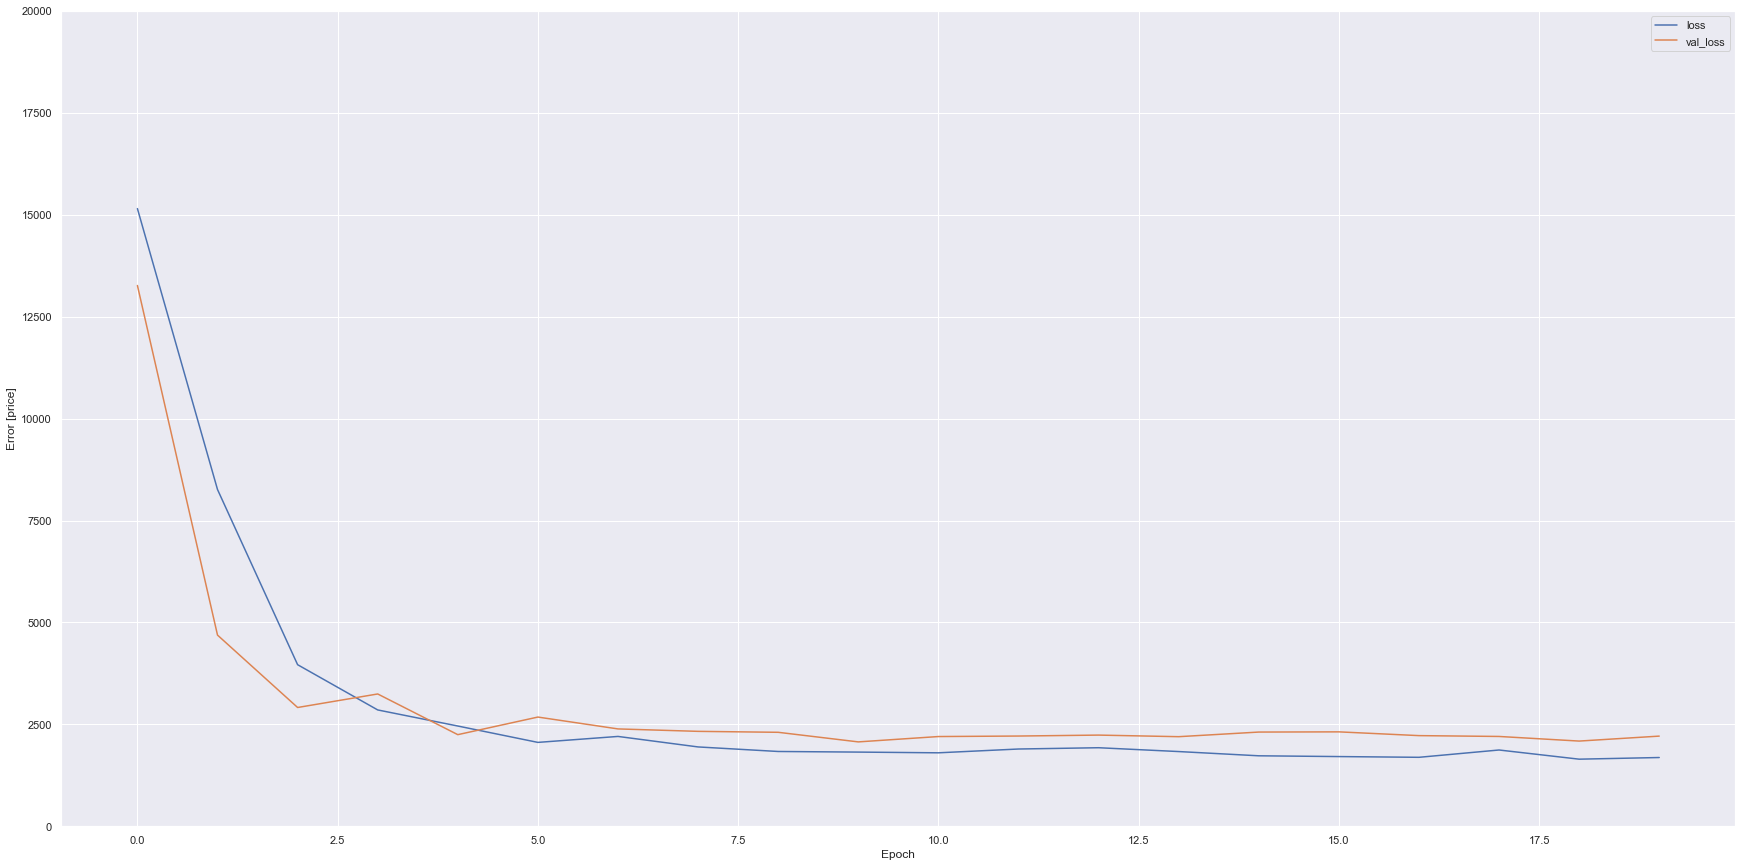

In [354]:
# EARLY STOPPING ADAM 0.001


def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


n_cols = X_train.shape[1]
dnn_50_ADAM_ES = build_and_compile_model(n_cols)


history = dnn_50_ADAM_ES.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[early_stop, PrintDot()])


dnn_50_ADAM_ES_y_pred = dnn_50_ADAM_ES.predict(X_test)
dnn_50_ADAM_ES_mse = mean_squared_error(y_test, dnn_50_ADAM_ES_y_pred)
dnn_50_ADAM_ES_mse

plot_loss(history)

In [276]:
dnn_50_ADAM_ES_mse

8647252.418764755


.............................................................................................

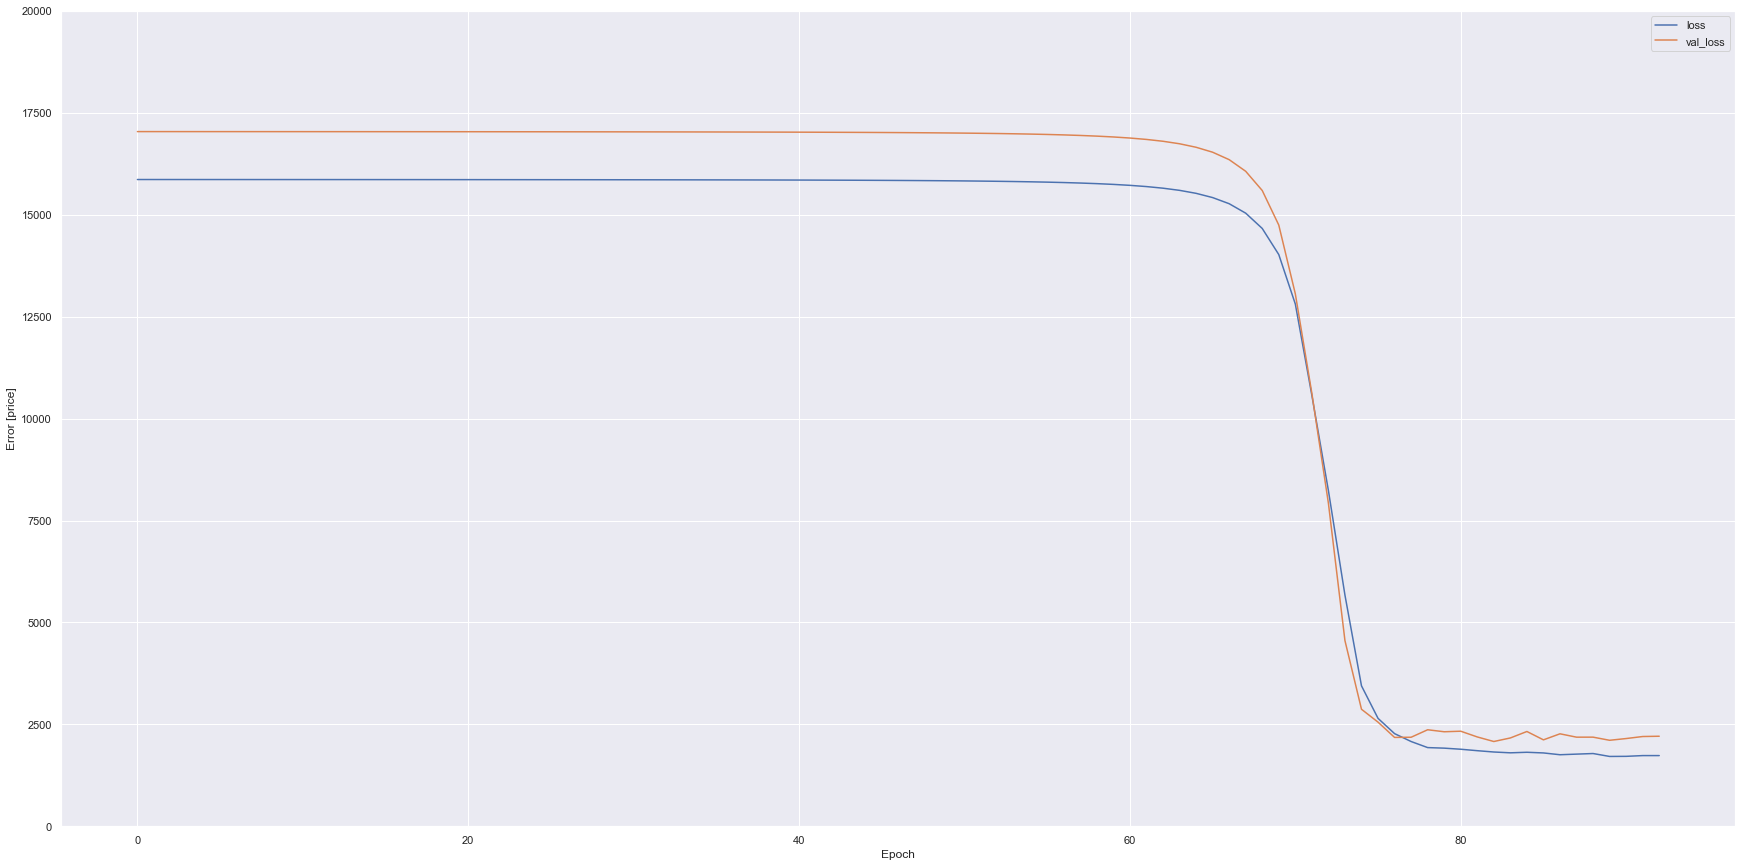

In [277]:
# EARLY STOPPING SGD 0.001


def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.SGD(0.001))
  return model


n_cols = X_train.shape[1]
dnn_50_SGD_ES = build_and_compile_model(n_cols)


history = dnn_50_SGD_ES.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[early_stop, PrintDot()])


dnn_50_SGD_ES_y_pred = dnn_50_SGD_ES.predict(X_test)
dnn_50_SGD_ES_mse = mean_squared_error(y_test, dnn_50_SGD_ES_y_pred)
dnn_50_SGD_ES_mse

plot_loss(history)

In [278]:
dnn_50_SGD_ES_mse

7753571.318647736

In [374]:
results_table = pd.DataFrame([[np.mean(lm_mse)],
                              [np.mean(dnn_50_mse)],
                             [np.mean(dnn_50_V1_mse)],
                              [np.mean(dnn_50_V2_mse)],
                              [np.mean(dnn_50_V4_mse)],
                              [np.mean(dnn_50_V5_mse)],
                              [np.mean(dnn_50_V6_mse)],
                              [np.mean(dnn_50_V7_mse)],   
                              [np.mean(dnn_50_ADAM_ES_mse)],  
                              [np.mean(dnn_50_SGD_ES_mse)],  
                             ],
                            columns=['MSE'],
                            index=["Linear Regression", 
                                   "DNN 50 Adam 0.001",
                                   "DNN 50 Adam 0.1",
                                    "DNN 50 Tanh 0.1",
                                    "DNN 50 RMSProp 0.1",
                                    "DNN 50 RMSProp 0.001",
                                   "DNN 50 SGD 0.1",
                                   "DNN 50 SGD 0.001",
                                   "DNN 50 ADAM ES 0.001",
                                   "DNN 50 SGD ES 0.001"
                                   
                                  ])
pd.options.display.precision = 3
results_table.sort_values(by='MSE', ascending=True)

,MSE
DNN 50 SGD ES 0.001,7.754e+06
DNN 50 SGD 0.001,7.981e+06
Linear Regression,8.364e+06
DNN 50 ADAM ES 0.001,8.455e+06
DNN 50 RMSProp 0.1,8.615e+06
DNN 50 Adam 0.001,8.647e+06
DNN 50 Adam 0.1,9.142e+06
DNN 50 RMSProp 0.001,9.492e+06
DNN 50 Tanh 0.1,4.234e+07
DNN 50 SGD 0.1,3.423e+08


In [375]:
results_table.sort_values(by='MSE', ascending=True)

,MSE
DNN 50 SGD ES 0.001,7.754e+06
DNN 50 SGD 0.001,7.981e+06
Linear Regression,8.364e+06
DNN 50 ADAM ES 0.001,8.455e+06
DNN 50 RMSProp 0.1,8.615e+06
DNN 50 Adam 0.001,8.647e+06
DNN 50 Adam 0.1,9.142e+06
DNN 50 RMSProp 0.001,9.492e+06
DNN 50 Tanh 0.1,4.234e+07
DNN 50 SGD 0.1,3.423e+08


In [289]:
# EARLY STOPPING SGD 0.001 30 Nodes


def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(30, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


n_cols = X_train.shape[1]
dnn_30_Adam_ES = build_and_compile_model(n_cols)


history = dnn_30_Adam_ES.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[early_stop, PrintDot()])


dnn_30_Adam_ES_y_pred = dnn_30_Adam_ES.predict(X_test)
dnn_30_Adam_ES_mse = mean_squared_error(y_test, dnn_30_Adam_ES_y_pred)
dnn_30_Adam_ES_mse



....................................................................................................
....................................................................................................
....................................................................................................

9564859.117993714

In [290]:
# EARLY STOPPING SGD 0.001 20 Nodes


def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


n_cols = X_train.shape[1]
dnn_20_Adam_ES = build_and_compile_model(n_cols)


history = dnn_20_Adam_ES.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[early_stop, PrintDot()])


dnn_20_Adam_ES_y_pred = dnn_20_Adam_ES.predict(X_test)
dnn_20_Adam_ES_mse = mean_squared_error(y_test, dnn_20_Adam_ES_y_pred)
dnn_20_Adam_ES_mse


....................................................................................................
....................................................................................................
....................................................................................................

10079902.392466482

In [291]:
# EARLY STOPPING SGD 0.001 10 Nodes


def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(10, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


n_cols = X_train.shape[1]
dnn_10_Adam_ES = build_and_compile_model(n_cols)


history = dnn_10_Adam_ES.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[early_stop, PrintDot()])


dnn_10_Adam_ES_y_pred = dnn_10_Adam_ES.predict(X_test)
dnn_10_Adam_ES_mse = mean_squared_error(y_test, dnn_10_Adam_ES_y_pred)
dnn_10_Adam_ES_mse


....................................................................................................
....................................................................................................
....................................................................................................

26813274.290352564

In [292]:
# EARLY STOPPING SGD 0.001 70 Nodes


def build_and_compile_model(shape):
  model = keras.Sequential([
      layers.Dense(shape, input_shape = (shape,), activation='relu'),
      layers.Dense(70, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


n_cols = X_train.shape[1]
dnn_70_Adam_ES = build_and_compile_model(n_cols)


history = dnn_70_Adam_ES.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=300, callbacks=[early_stop, PrintDot()])


dnn_70_Adam_ES_y_pred = dnn_70_Adam_ES.predict(X_test)
dnn_70_Adam_ES_mse = mean_squared_error(y_test, dnn_70_Adam_ES_y_pred)
dnn_70_Adam_ES_mse


....................................................................................................
....................................................................................................
....................................................................................................

9254533.1243923

In [378]:


results_table = pd.DataFrame([[np.mean(lm_mse)],
                              [np.mean(dnn_50_mse)],
                             [np.mean(dnn_50_V1_mse)],
                              [np.mean(dnn_50_V2_mse)],
                              [np.mean(dnn_50_V4_mse)],
                              [np.mean(dnn_50_V5_mse)],
                              [np.mean(dnn_50_V6_mse)],
                              [np.mean(dnn_50_V7_mse)],   
                              [np.mean(dnn_50_ADAM_ES_mse)],  
                              [np.mean(dnn_50_SGD_ES_mse)],  
                              
                              [np.mean(dnn_10_SGD_ES_mse)],
                              [np.mean(dnn_20_SGD_ES_mse)],
                              [np.mean(dnn_30_SGD_ES_mse)],
                              [np.mean(dnn_70_SGD_ES_mse)],
                              
                               [np.mean(dnn_10_Adam_ES_mse)],
                              [np.mean(dnn_20_Adam_ES_mse)],
                              [np.mean(dnn_30_Adam_ES_mse)],
                              [np.mean(dnn_70_Adam_ES_mse)],
                             ],
                            columns=['MSE'],
                            index=["Linear Regression", 
                                   "DNN 50 Adam 0.001",
                                   "DNN 50 Adam 0.1",
                                    "DNN 50 Tanh 0.1",
                                    "DNN 50 RMSProp 0.1",
                                    "DNN 50 RMSProp 0.001",
                                   "DNN 50 SGD 0.1",
                                   "DNN 50 SGD 0.001",
                                   "DNN 50 ADAM ES 0.001",
                                   "DNN 50 SGD ES 0.001",
                                   
                                   "DNN 10 SGD ES 0.001",
                                   "DNN 20 SGD ES 0.001",
                                   "DNN 30 SGD ES 0.001",
                                   "DNN 70 SGD ES 0.001",
                                   
                                   "DNN 10 Adam ES 0.001",
                                   "DNN 20 Adam ES 0.001",
                                   "DNN 30 Adam ES 0.001",
                                   "DNN 70 Adam ES 0.001"
                                   
                                  ])
pd.options.display.precision = 3
results_table.sort_values(by='MSE', ascending=True)

,MSE
DNN 50 SGD ES 0.001,7.754e+06
DNN 70 SGD ES 0.001,7.796e+06
DNN 30 SGD ES 0.001,7.937e+06
DNN 50 SGD 0.001,7.981e+06
DNN 20 SGD ES 0.001,8.018e+06
DNN 10 SGD ES 0.001,8.227e+06
Linear Regression,8.364e+06
DNN 50 ADAM ES 0.001,8.455e+06
DNN 50 RMSProp 0.1,8.615e+06
DNN 50 Adam 0.001,8.647e+06


In [351]:
dnn_10_Adam_SE.summary()

NameError: name 'dnn_10_Adam_SE' is not defined

# CROSS VALIDATION OF BEST MODEL WITH SGD

In [296]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(50, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.SGD(0.001), metrics=['mse'])
    return model

In [297]:
SGD_dnn_50 = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)
SGD_dnn_50_ES = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [298]:
SGD_dnn_50_history = SGD_dnn_50.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [299]:
SGD_dnn_50_ES_history = SGD_dnn_50_ES.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


.......................................................................................

In [300]:
SGD_rez = []
for i in range(1, 11):
    

    cv = KFold(n_splits=4, shuffle=True, random_state=i)

    SGD_rez.append(cross_val_score(SGD_dnn_50, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [324]:
for i in range(1, 11):
    

    cv = KFold(n_splits=4, shuffle=True, random_state=i)

    SGD_ES_rez.append(cross_val_score(SGD_dnn_50_ES, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   25.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   25.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [303]:
len(SGD_rez)

20

In [307]:
SGD_rez = SGD_rez[0:10]

[[Text(0, 0, 'lm_res'),
  Text(1, 0, 'SVlm_res'),
  Text(2, 0, 'dnn_40_res'),
  Text(3, 0, 'dnn_40_res'),
  Text(4, 0, 'SVdnn_40_res'),
  Text(5, 0, 'dnn_40_ES_res'),
  Text(6, 0, 'SVdnn_40_ES_res'),
  Text(7, 0, 'dnn_50_res'),
  Text(8, 0, 'SVdnn_50_res'),
  Text(9, 0, 'dnn_50_ES_res'),
  Text(10, 0, 'SVdnn_50_ES_res'),
  Text(11, 0, 'dnn_2_layers_res'),
  Text(12, 0, 'SVdnn_2_layers_res'),
  Text(13, 0, 'dnn_2_layers_ES_res'),
  Text(14, 0, 'SVdnn_2_layers_ES_res'),
  Text(15, 0, 'SGD_res'),
  Text(16, 0, 'SGD_ES_res')]]

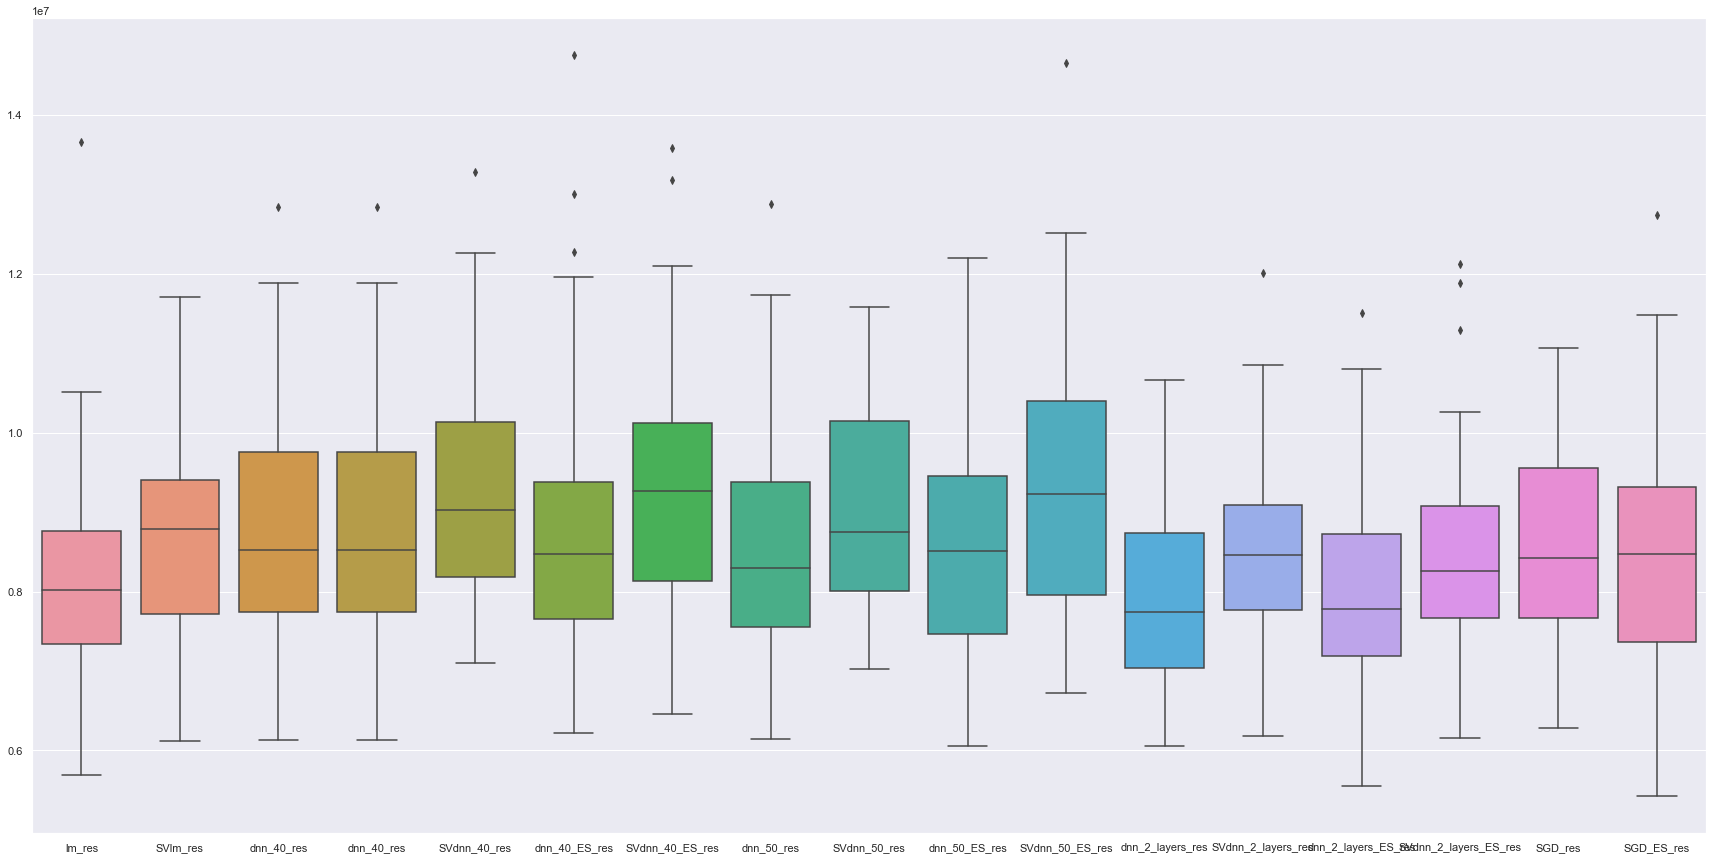

In [328]:
union = [lm_res, SVlm_res,dnn_40_res, dnn_40_res, SVdnn_40_res, dnn_40_ES_res, SVdnn_40_ES_res, dnn_50_res, SVdnn_50_res, dnn_50_ES_res, SVdnn_50_ES_res, dnn_2_layers_res, SVdnn_2_layers_res, dnn_2_layers_ES_res, SVdnn_2_layers_ES_res, SGD_res, SGD_ES_res]

g = sns.boxplot(data=union)
sns.set(rc={'figure.figsize':(30,15)})

g.set(xticklabels=['lm_res', 'SVlm_res','dnn_40_res', 'dnn_40_res', 'SVdnn_40_res', 'dnn_40_ES_res', 'SVdnn_40_ES_res', 'dnn_50_res', 'SVdnn_50_res', 'dnn_50_ES_res', 'SVdnn_50_ES_res', 'dnn_2_layers_res', 'SVdnn_2_layers_res', 'dnn_2_layers_ES_res', 'SVdnn_2_layers_ES_res', 'SGD_res', 'SGD_ES_res'])


In [316]:
SGD_res = []
for i in range(10):
    for j in SGD_rez[i]:

            SGD_res.append(abs(j))

In [326]:
SGD_ES_res = []
for i in range(10):
    for j in SGD_ES_rez[i]:

            SGD_ES_res.append(abs(j))

In [327]:
SGD_ES_res

[8991934.727378327,
 8951331.683310768,
 6711900.99531725,
 9238542.238313502,
 9034276.466579713,
 5422037.885388127,
 9812945.166900873,
 9135230.24615819,
 9394354.623301258,
 7349694.82718986,
 9509307.133085715,
 9000391.833004676,
 8199306.050065288,
 6898223.101578548,
 8027478.714644569,
 8044874.907493034,
 10052008.653933909,
 8986915.401484258,
 6923787.905501163,
 7375483.175370298,
 6731650.400282224,
 12742860.733337391,
 9860325.268949745,
 9287726.708852302,
 11476865.608856948,
 10226357.351333788,
 7600417.053971316,
 7800127.660733203,
 8175778.754639021,
 8392031.068303699,
 8869609.81249808,
 7158167.338974791,
 7099163.425777026,
 7797133.151463179,
 7707197.771306908,
 10200880.786543773,
 8562566.298976196,
 6703331.034224332,
 6669195.588294876,
 10425672.952893108]

[[Text(0, 0, 'lm_res'),
  Text(1, 0, 'dnn_40_res'),
  Text(2, 0, 'dnn_40_ES_res'),
  Text(3, 0, 'dnn_50_res'),
  Text(4, 0, 'dnn_50_ES_res'),
  Text(5, 0, 'dnn_2_layers_res'),
  Text(6, 0, 'dnn_2_layers_ES_res'),
  Text(7, 0, 'SGD_res'),
  Text(8, 0, 'SGD_ES_res')]]

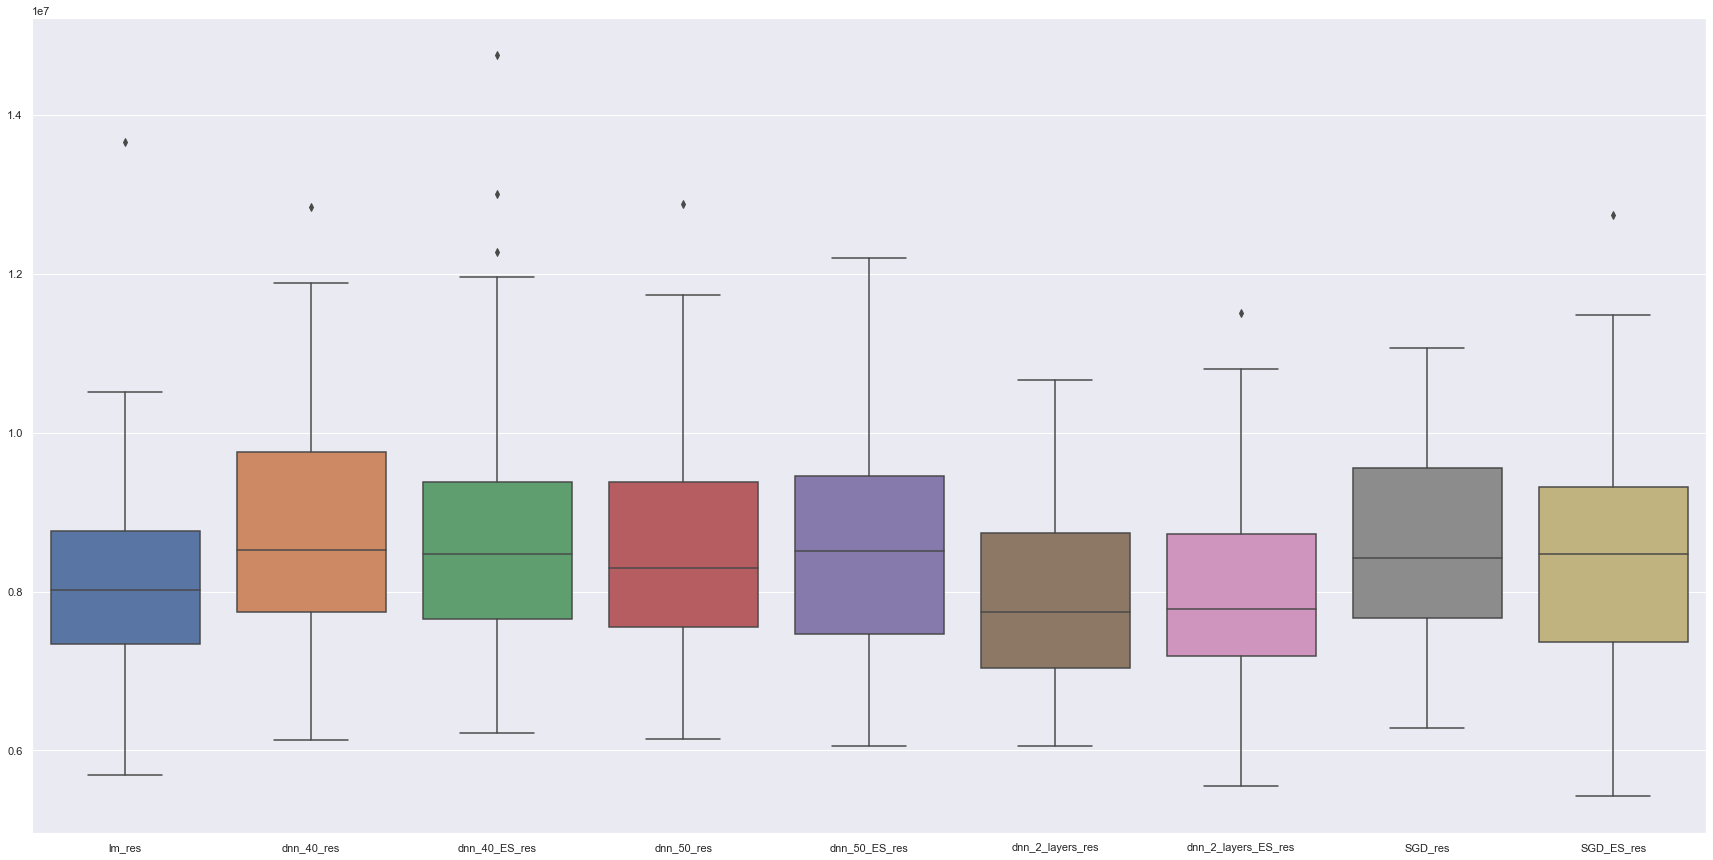

In [356]:
union = [lm_res , dnn_40_res,  dnn_40_ES_res,  dnn_50_res, dnn_50_ES_res, dnn_2_layers_res, dnn_2_layers_ES_res , SGD_res, SGD_ES_res]

g = sns.boxplot(data=union)
sns.set(rc={'figure.figsize':(30,15)})

g.set(xticklabels=['lm_res', 'dnn_40_res',  'dnn_40_ES_res',  'dnn_50_res',  'dnn_50_ES_res',  'dnn_2_layers_res',  'dnn_2_layers_ES_res', 'SGD_res', 'SGD_ES_res'])


# ADDING SGD TO 2 LAYER MODEL 

In [330]:
def build_and_compile_model():
    n_cols = X_train.shape[1]
    model = keras.Sequential([
          layers.Dense(n_cols, input_shape = (n_cols,), activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.SGD(0.001), metrics=['mse'])
    return model

In [332]:
SGD_dnn_2L = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)
SGD_dnn_2L_ES = KerasRegressor(build_fn=build_and_compile_model, epochs=300, batch_size=20, verbose=0)

In [333]:
SGD_dnn_2L_history = SGD_dnn_2L.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [334]:
SGD_dnn_2L_ES_history = SGD_dnn_2L_ES.fit(
    X_train, y_train,
    validation_split=0.2,callbacks=[early_stop, PrintDot()])


.................................................

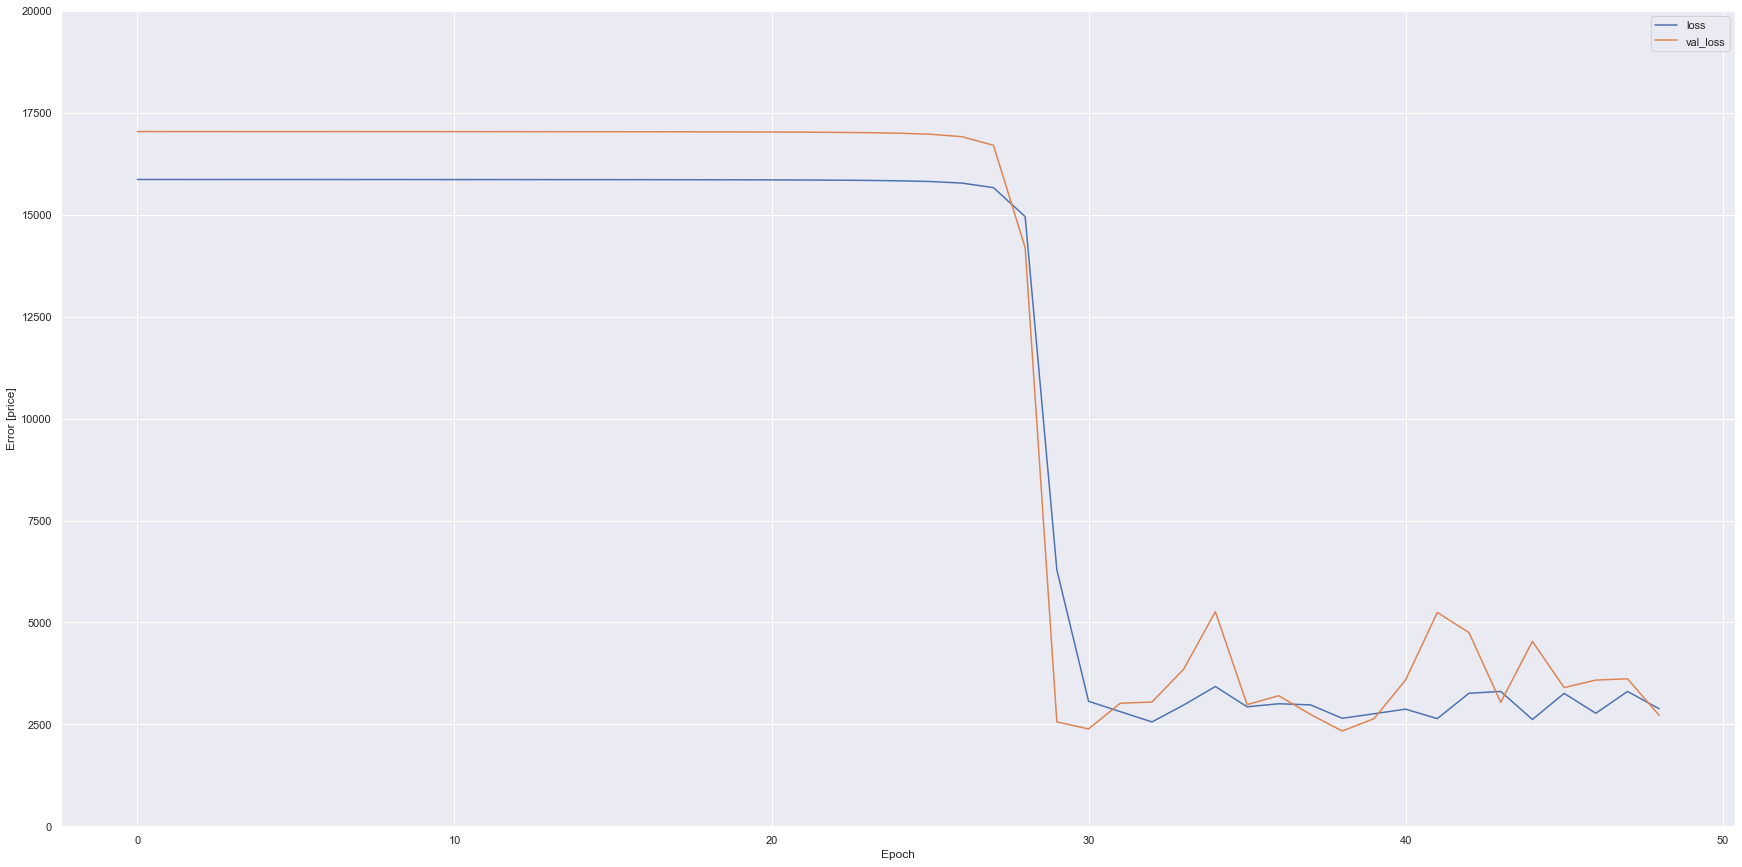

In [359]:
plot_loss(SGD_dnn_2L_ES_history)

In [335]:
SGD_2L_rez = []
for i in range(1, 11):
    

    cv = KFold(n_splits=4, shuffle=True, random_state=i)

    SGD_2L_rez.append(cross_val_score(SGD_dnn_2L, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))
    
    
SGD_2L_res = []
for i in range(10):
    for j in SGD_2L_rez[i]:

            SGD_2L_res.append(abs(j))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [336]:
SGD_2L_ES_rez = []
for i in range(1, 11):
    

    cv = KFold(n_splits=4, shuffle=True, random_state=i)

    SGD_2L_ES_rez.append(cross_val_score(SGD_dnn_2L_ES, X_train, y_train, cv=cv, scoring="neg_mean_squared_error",verbose=1))
    
    
SGD_2L_ES_res = []
for i in range(10):
    for j in SGD_2L_ES_rez[i]:

            SGD_2L_ES_res.append(abs(j))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[[Text(0, 0, 'lm_res'),
  Text(1, 0, 'dnn_40_res'),
  Text(2, 0, 'dnn_40_res'),
  Text(3, 0, 'dnn_40_ES_res'),
  Text(4, 0, 'dnn_50_res'),
  Text(5, 0, 'dnn_50_ES_res'),
  Text(6, 0, 'dnn_2_layers_res'),
  Text(7, 0, 'dnn_2_layers_ES_res'),
  Text(8, 0, 'SGD_res'),
  Text(9, 0, 'SGD_ES_res'),
  Text(10, 0, 'SGD_2L_res'),
  Text(11, 0, 'SGD_2L_ES_res')]]

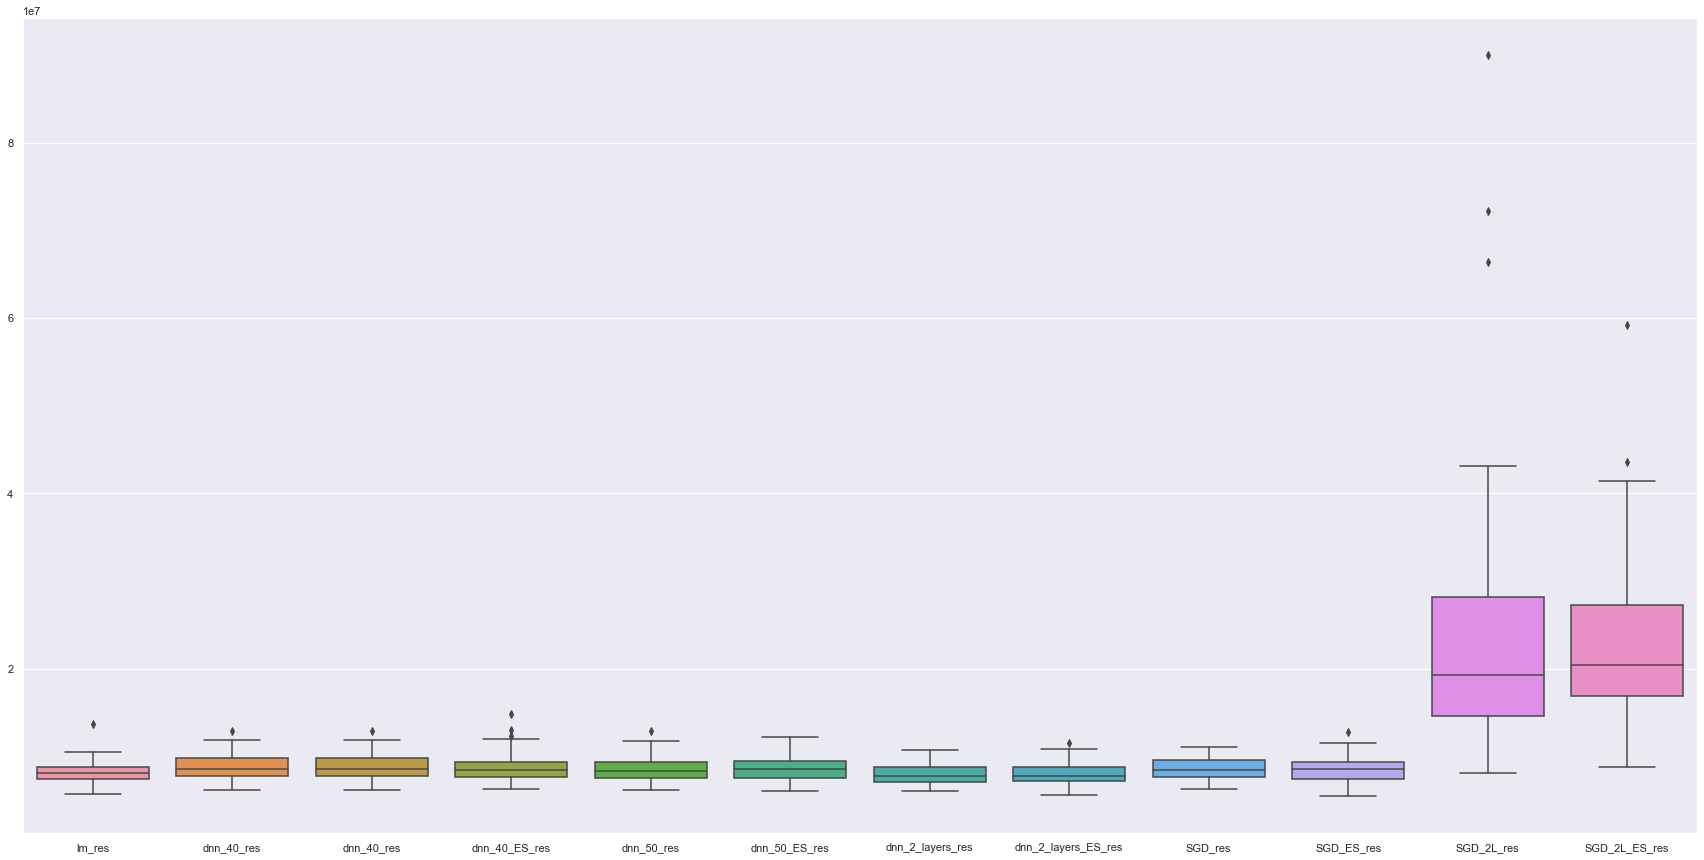

In [337]:
union = [lm_res ,dnn_40_res, dnn_40_res,  dnn_40_ES_res,  dnn_50_res, dnn_50_ES_res, dnn_2_layers_res, dnn_2_layers_ES_res , SGD_res, SGD_ES_res, SGD_2L_res ,SGD_2L_ES_res]

g = sns.boxplot(data=union)
sns.set(rc={'figure.figsize':(30,15)})

g.set(xticklabels=['lm_res','dnn_40_res', 'dnn_40_res',  'dnn_40_ES_res',  'dnn_50_res',  'dnn_50_ES_res',  'dnn_2_layers_res',  'dnn_2_layers_ES_res', 'SGD_res', 'SGD_ES_res', 'SGD_2L_res', 'SGD_2L_ES_res'])


In [347]:
X_train

,mileage,tax,mpg,engineSize,2016,2017,2018,2019,2020,Diesel,...,Automatic,Manual,Semi-Auto,BMW,Ford,Hyundai,audi,skoda,toyota,vw
357,-0.832,0.436,-0.410,-0.392,-0.469,1.587,-0.446,-0.691,-0.222,-0.769,...,-0.536,0.861,-0.504,-0.408,-0.408,-0.408,2.449,-0.408,-0.408,-0.408
649,0.878,0.436,0.362,-0.813,-0.469,1.587,-0.446,-0.691,-0.222,-0.769,...,-0.536,0.861,-0.504,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408,2.449
291,-0.621,0.436,-0.912,-1.235,-0.469,-0.630,-0.446,1.448,-0.222,-0.769,...,-0.536,0.861,-0.504,-0.408,-0.408,2.449,-0.408,-0.408,-0.408,-0.408
420,-0.824,0.436,-1.166,-0.181,-0.469,-0.630,-0.446,1.448,-0.222,-0.769,...,-0.536,0.861,-0.504,-0.408,-0.408,-0.408,-0.408,2.449,-0.408,-0.408
177,-0.333,0.436,0.362,-1.235,-0.469,-0.630,-0.446,1.448,-0.222,-0.769,...,-0.536,0.861,-0.504,-0.408,2.449,-0.408,-0.408,-0.408,-0.408,-0.408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.900,0.436,1.340,-0.181,-0.469,-0.630,-0.446,1.448,-0.222,1.301,...,-0.536,0.861,-0.504,2.449,-0.408,-0.408,-0.408,-0.408,-0.408,-0.408
106,-0.306,0.436,-1.119,0.873,-0.469,-0.630,2.244,-0.691,-0.222,-0.769,...,-0.536,0.861,-0.504,-0.408,2.449,-0.408,-0.408,-0.408,-0.408,-0.408
270,-0.665,-1.859,0.362,-1.235,2.134,-0.630,-0.446,-0.691,-0.222,-0.769,...,-0.536,0.861,-0.504,-0.408,-0.408,2.449,-0.408,-0.408,-0.408,-0.408
435,1.640,0.436,-0.474,0.873,-0.469,-0.630,2.244,-0.691,-0.222,1.301,...,1.867,-1.161,-0.504,-0.408,-0.408,-0.408,-0.408,2.449,-0.408,-0.408
